# ***NO SHOW ANALYSIS STUDY*** 
___



## Table of Contents
### 1. Introduction
1. [what is no show](#what-is-no-show)

### 2.  ***Steps for analysis process***
1. [Steps for analysis process](#Steps-for-analysis-process)

### 3. ***questions***
1. [1.1- questions](#1.1--questions)


### 4. ***Data Collection and Wrangling***
1. [a-gathering data](#a-gathering-data)
* [b-assessing data](#b-assessing-data)
* [c-cleaning data](#c-cleaning-data)
* [Observations](#Observations)

### 5. ***DATA ANALYSIS and  exploration ***

* [EDA(EXPLORATORY DATA ANALYSIS )](#EDA(EXPLORATORY-DATA-ANALYSIS-))

* [finding pattern](#finding-pattern)

* [1- age study:](#1--age-study:)

   * [visualize relationship](#visualize-relationship)
   
   * [build intution](#build-intution)
   
   * [creat more and describtive feture](#creat-more-and-describtive-feture)
   
   * [conclusion :](#conclusion-:)
   
 
* [2-waiting days study:](#2-waiting-days-study:)

  * [1.visualize relationship](#1.visualize-relationship)

  * [2.build intution](#2.build-intution)
  
  * [3.creat more and describtive feture](#3.creat-more-and-describtive-feture)
  
  * [4.conclusion :](#4.conclusion-:)
  

* [3- gender study:](#3--gender-study:)

   * [3.1visualize relationship](#3.1visualize-relationship)
   
   * [3.2build intution](#3.2build-intution)
   
   * [3.3creat more and describtive feture](#3.3creat-more-and-describtive-feture)
   
   * [3.4conclusion :](#3.4conclusion-:)  
  
---
### 1. Introduction

# what is no show

###### This dataset collects information from 100k medical appointments inBrazil and is focused on the quetion <br>
###### of whether or not patients show upfor their appointment.<br>
###### A number ofcharacteristics about the patient are included in each row.<br>
###### ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.<br>
###### ● ‘Neighborhood’ indicates the location of the hospital.<br>
###### ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
###### ● Be careful about the encoding of the last column: it says ‘No’ ifthe patient showed up to their appointment,
###### and ‘Yes’ if theydid not show up.
---


___
# ***Steps for analysis process***
### 2.  ***Steps for analysis process***
### 1- questions
### 2- wrangle
* a- gather 
* b- assess 
* c- clean

### 3- explor

* EDA(exploratotry data analysis ) 
* AUGMENTIG data to maximize the potential of analysis ,visualization and modeles
* finding pattern
* visualize relationship
* build intution
* remove outliers
* creat more and decribtive feture

### 4- draw conclousion
### 5- comunicate

___

# ***1.1- questions***
<div class="alert alert-block alert-info">
<b>
This study focuses on three factors, age ,sex and gender and tries to find a relationship through which to predict the extent of the commitment of patients to their show up at appointment dates of visits specified to them and tries to answer questions like<br>
1- What factors may help to predict if a patient will show up for their scheduled appointment?<br>
2- Why do 30% of patients miss their scheduled appointments?<br>
3- is that possible to predict someone to no-show an appointment?<br>
4- Is there any relation between patients age and their commitment to appointment attendens?<br>    
5- Is there any  relationship of the waiting days between the schedule_day and appointment_day affect on the commitment to attends?<br>
6- Is there any relation between patients gender and their commitment to appointment attendens?<br>    
7- does gender in different age stage affects their commitment to show up on the appointement date?
 
</div>

### 2. ***Data Collection and Wrangling***



#### ***a-gathering data***

we already have data so we need to have general look to see what data we have to see what type of question we can aske in this analysis 

In [1]:
# we will import all liberies we need in our analysis
import pandas as pd
import numpy as np
import datetime
from time import strftime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('C:\\Users\\zas\\Downloads\\class3\\no show\\noshowappointments-kagglev2-may-2016.csv',sep=',')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### ***b-assessing data***

In [2]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# same thing applies to `.tail()` which returns the last few rows
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# this returns a tuple of the dimensions of the dataframe
print('total number of rows in data => {}'.format(df.shape[0]))
print('total number of columns in data => {}'.format(df.shape[1]))

total number of rows in data => 110527
total number of columns in data => 14


In [5]:
# general information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


### ***c-cleaning data***

### ***check data for :***<br>***1-missing data*** <br>  ***2-duplicate data***  <br>   ***3-incorrect data types***


In [6]:
# check missing value as see in above no missing values but to confirm:

print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### ======>>>>>   :     No null values

In [7]:
#check duplicated data
df.duplicated().sum()

0

### ======>>>>>   :     No  duplicated data



<div class="alert alert-block alert-success">
<b>what type of data we have?</b> 
</div>


### object data type need further investigation to shows - what is it?

In [8]:
type(df['Gender'][0])

str

In [9]:
type(df['AppointmentDay'][0])

str

In [10]:
type(df['Neighbourhood'][0])

str

In [11]:
type(df['ScheduledDay'][0])

str

In [12]:
type(df['No-show'][0])

str

### Observations

### ===>>> : 
<div class="alert alert-block alert-success">
<b>some fieldes of incorect data type and  need to change</b> 
</div>


In [13]:
# we have date time object type  so we need to change it to date time
df['PatientId'] = df['PatientId'].astype('int64')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [14]:
# Get Day of the Week for ScheduledDay and AppointmentDay
df['schedule_day_week'] = df['ScheduledDay'].dt.weekday_name
df['appointment_day_week'] = df['AppointmentDay'].dt.weekday_name

In [15]:
# Get the Waiting Time in Days of the Patients.
df['waiting_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['waiting_days'] = df['waiting_days'].dt.days

# Sort by date

In [16]:
df.sort_values(["ScheduledDay","AppointmentDay"], inplace=True, ascending=True) 

# rename columns 

In [17]:
df.rename(columns={'PatientId':'patient_id','AppointmentID': 'appointment_id' , 'Neighbourhood':'neighborhood','Gender':'gender','Scholarship':'scholarship',
                   'Hipertension':'hypertension', 'Handcap':'handicap','Diabetes':'diabetes','Alcoholism':'alcoholism',
                   'SMS_received':'sms_received','ScheduledDay':'schedule_day', 'AppointmentDay':'appointment_day','Age':'age',
                   'No-show':'no_show'}, inplace=True)

In [18]:
#check data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 3764 to 110514
Data columns (total 17 columns):
patient_id              110527 non-null int64
appointment_id          110527 non-null int64
gender                  110527 non-null object
schedule_day            110527 non-null datetime64[ns]
appointment_day         110527 non-null datetime64[ns]
age                     110527 non-null int64
neighborhood            110527 non-null object
scholarship             110527 non-null int64
hypertension            110527 non-null int64
diabetes                110527 non-null int64
alcoholism              110527 non-null int64
handicap                110527 non-null int64
sms_received            110527 non-null int64
no_show                 110527 non-null object
schedule_day_week       110527 non-null object
appointment_day_week    110527 non-null object
waiting_days            110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(5)
memory usage: 13.1+ MB


In [19]:
# check data 
df.head(3)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days
3764,832256398961987,5030230,F,2015-11-10,2016-05-04,51,RESISTÊNCIA,0,0,0,0,0,1,No,Tuesday,Wednesday,176
46292,91637474953513,5122866,M,2015-12-03,2016-05-02,34,VILA RUBIM,0,1,0,0,0,1,Yes,Thursday,Monday,151
102786,454287126844,5134227,M,2015-12-07,2016-06-03,67,MARUÍPE,0,1,1,0,0,0,No,Monday,Friday,179


In [20]:
# this returns the number of unique values in each column FOR ALL
df.nunique()

patient_id               62299
appointment_id          110527
gender                       2
schedule_day               111
appointment_day             27
age                        104
neighborhood                81
scholarship                  2
hypertension                 2
diabetes                     2
alcoholism                   2
handicap                     5
sms_received                 2
no_show                      2
schedule_day_week            6
appointment_day_week         6
waiting_days               131
dtype: int64

### what are the unique values for:


<div class="alert alert-block alert-info">
<b>gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,smreceived and no_show ?</b>
</div>


In [21]:
print("Unique Values in `Gender` => {}".format(df.gender.unique()))
print("Unique Values in `Scholarship` => {}".format(df.scholarship.unique()))
print("Unique Values in `Hypertension` => {}".format(df.hypertension.unique()))
print("Unique Values in `Diabetes` => {}".format(df.diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(df.alcoholism.unique()))
print("Unique Values in `Handicap` => {}".format(df.handicap.unique()))
print("Unique Values in `Sms_received` => {}".format(df.sms_received.unique()))
print("Unique Values in `No_show` => {}".format(df.no_show.unique()))

Unique Values in `Gender` => ['F' 'M']
Unique Values in `Scholarship` => [0 1]
Unique Values in `Hypertension` => [0 1]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `Sms_received` => [1 0]
Unique Values in `No_show` => ['No' 'Yes']


In [22]:
# unique data for patient_id 
print('Number of unque values of patient_id =>  : {}'.format(df.patient_id.unique().shape[0]))
print('percent of patient who registered for appointment more than one time =>  : {} % of total patient'.format((1-(df.patient_id.unique().shape[0])/(df.patient_id.shape[0]))*100))

Number of unque values of patient_id =>  : 62299
percent of patient who registered for appointment more than one time =>  : 43.63458702398509 % of total patient


In [23]:
# Print Unique Values for 'schedule_day'
print("Unique Values in `schedule_day` => {}".format(np.sort(df.schedule_day.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `schedule_day` => ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' '


<div class="alert alert-block alert-success">
<b> We can see from the above details that the schedule_day for appointments are: <br>starting from 2015-11-10 upto 2016-06-08 <br> that's around 7 months .</b> 
</div>

In [24]:
# Print Unique Values for 'AppointmentDay'
print("Unique Values in `appointment_day` => {}".format(np.sort(df.appointment_day.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `appointment_day` => ['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


###  starting from 2016-04-29 upto 2016-06-08. that's around 1 month

In [25]:
# Print Unique Values for 'waiting_days'
print("Unique Values in `waiting_days` => {}".format(np.sort(df.waiting_days.unique())))

Unique Values in `waiting_days` => [ -6  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98 101 102 103 104 105 107 108
 109 110 111 112 115 117 119 122 123 125 126 127 132 133 139 142 146 151
 155 162 169 176 179]


In [26]:
#cleaning data for waiting days
df[df['waiting_days']==-6]


,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Wednesday,Thursday,-6


In [27]:
print(df[df['waiting_days']==-6].shape[0])

1


In [28]:
df[df['waiting_days']==-1]

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Wednesday,Tuesday,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Thursday,Wednesday,-1
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Tuesday,Monday,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Wednesday,Tuesday,-1


In [29]:
df[df['waiting_days']==-1].shape

(4, 17)

# ===>>>( -6 waitng_days) this may be by mistake <br>===>>> (-1 waiting_days) this may be by mistake  

In [30]:
# to drop this wrong data by using index
df.drop([71533,72362,64175,27033,55226],inplace= True)

In [31]:
# Print Unique Values for 'waiting_days to check cleaning process'
print("Unique Values in `waiting_days` => {}".format(np.sort(df.waiting_days.unique())))

Unique Values in `waiting_days` => [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98 101 102 103 104 105 107 108 109 110
 111 112 115 117 119 122 123 125 126 127 132 133 139 142 146 151 155 162
 169 176 179]


In [32]:
# unique values in age and clean data
df['age'][0]
type(df['age'][0])

numpy.int64

In [33]:
print("Unique Values in `age` => {}".format(np.sort(df.age.unique())))

Unique Values in `age` => [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [34]:
df.query('age == -1')

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,Monday,Monday,0


**Note there is one row that contain age -1 in min . So lets drop that row.**<br>
* Note (-1) may be mistak in recording or she is pregnant wamen and the appointment for embryo investigation *

In [35]:
# to drop this wrong data by using index
df.drop([99832],inplace= True)

In [36]:
# to check cleaning process
print("Unique Values in `age` => {}".format(np.sort(df.age.unique())))

Unique Values in `age` => [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [37]:
# Print Unique Values for 'neighborhood'
print("Unique Values in `neighborhood` => {}".format(np.sort(df.neighborhood.unique())))

Unique Values in `neighborhood` => ['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA 

In [38]:
# check all the data with general look
# this returns useful descriptive statistics for each column of data
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,waiting_days
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,10.184345
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15.255153
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 3764 to 110514
Data columns (total 17 columns):
patient_id              110521 non-null int64
appointment_id          110521 non-null int64
gender                  110521 non-null object
schedule_day            110521 non-null datetime64[ns]
appointment_day         110521 non-null datetime64[ns]
age                     110521 non-null int64
neighborhood            110521 non-null object
scholarship             110521 non-null int64
hypertension            110521 non-null int64
diabetes                110521 non-null int64
alcoholism              110521 non-null int64
handicap                110521 non-null int64
sms_received            110521 non-null int64
no_show                 110521 non-null object
schedule_day_week       110521 non-null object
appointment_day_week    110521 non-null object
waiting_days            110521 non-null int64
dtypes: datetime64[ns](2), int64(10), object(5)
memory usage: 13.1+ MB


In [40]:
df.sample(3)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days
92745,3577217613616,5753311,F,2016-05-31,2016-06-01,57,JARDIM CAMBURI,0,0,0,0,0,0,No,Tuesday,Wednesday,1
57588,29385646535938,5732125,F,2016-05-24,2016-05-25,48,SÃO BENEDITO,0,0,0,0,0,0,Yes,Tuesday,Wednesday,1
39927,3719512376873,5745470,F,2016-05-30,2016-05-30,39,JARDIM CAMBURI,0,0,0,0,0,0,No,Monday,Monday,0


In [41]:
# checking data for unique  value for patient_id   
df.shape

(110521, 17)

In [42]:
no_show_mask=df[df['no_show']== 'No']
no_show_mask.groupby(['no_show']).patient_id.value_counts()

no_show  patient_id     
No       822145925426128    87
         99637671331        80
         26886125921145     70
         33534783483176     65
         258424392677       62
         75797461494159     60
         6264198675331      59
         871374938638855    59
         66844879846766     56
         872278549442       54
         89239687393655     52
         8435223536         51
         853439686798559    50
         65433599726992     45
         14479974122994     41
         9452745294842      40
         81894521843749     40
         188232341789524    38
         2271579924275      36
         13364929297498     35
         986162815579582    34
         88834999836575     33
         9496196639835      32
         712458866975343    32
         6128878448536      29
         1484143378533      28
         81213966782532     25
         416755661551767    25
         8634164126317      24
         36994987339512     20
                            ..
         99794

In [43]:
no_show_mask.groupby(['no_show']).patient_id.value_counts().describe()

count    54153.000000
mean         1.628848
std          1.638682
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         87.000000
Name: patient_id, dtype: float64

# ohh !!!
<div class="alert alert-block alert-success">
<b>from above describtive data there are some observartion</b> 
</div>
 
#### 1. range of patients who show up start from : 1 show up time up to : 87 show up time 
#### 2. we need to investigate patients who were show up <= 2 times as 75% of patient showup 2 times or less
#### 3. we need to investigate patient who were show up > 87 times  as 25% of patient showup 2 times or more




<div class="alert alert-block alert-info">
<b>so  who is this patient that book 87 appointment?</b>
</div>


In [44]:
no_show_mask.query('patient_id== 822145925426128').nunique()

patient_id               1
appointment_id          87
gender                   1
schedule_day            24
appointment_day         24
age                      1
neighborhood             1
scholarship              1
hypertension             1
diabetes                 1
alcoholism               1
handicap                 1
sms_received             2
no_show                  1
schedule_day_week        5
appointment_day_week     5
waiting_days             6
dtype: int64

In [45]:
no_show_mask.query('patient_id== 822145925426128').schedule_day.value_counts()

2016-05-13    7
2016-06-01    6
2016-05-25    5
2016-05-16    5
2016-05-04    5
2016-06-08    5
2016-05-20    5
2016-05-18    4
2016-05-24    4
2016-06-03    4
2016-05-30    4
2016-06-06    4
2016-05-02    3
2016-05-09    3
2016-04-29    3
2016-05-31    3
2016-05-06    3
2016-05-12    3
2016-05-10    3
2016-05-17    3
2016-05-11    2
2016-05-03    1
2016-05-05    1
2016-06-02    1
Name: schedule_day, dtype: int64

In [46]:
print("frequencey of Unique Values in `schedule_day` => {}".format(np.sort(no_show_mask.query('patient_id== 822145925426128').schedule_day.value_counts())))

frequencey of Unique Values in `schedule_day` => [1 1 1 2 3 3 3 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 7]


In [47]:
print("values in `schedule_day` => {}".format(np.sort(no_show_mask.query('patient_id== 822145925426128').schedule_day)))

values in `schedule_day` => ['2016-04-29T00:00:00.000000000' '2016-04-29T00:00:00.000000000'
 '2016-04-29T00:00:00.000000000' '2016-05-02T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-02T00:00:00.000000000'
 '2016-05-03T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-04T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-04T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-06T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-06T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-05-09T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-05-10T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-10T00:00:00.000000000'
 '2016-05-11T00:00:00.000000000' '2016-05-11T00:00:00.000000000'
 '2016-05-12T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-12T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '2016-05-13T00:00:00.000000000' '2016-05-13T00:00:00.00000000

In [48]:
# describtive data for patient_id== 822145925426128
no_show_mask.query('patient_id== 822145925426128').describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,waiting_days
count,8.700000e+01,8.700000e+01,87.0,87.0,87.0,87.0,87.0,87.0,87.000000,87.000000
mean,8.221459e+14,5.716648e+06,38.0,0.0,0.0,0.0,0.0,0.0,0.022989,0.735632
std,0.000000e+00,4.250145e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.150736,2.982350
min,8.221459e+14,5.638995e+06,38.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,8.221459e+14,5.684154e+06,38.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,8.221459e+14,5.714349e+06,38.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,8.221459e+14,5.753104e+06,38.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
max,8.221459e+14,5.790220e+06,38.0,0.0,0.0,0.0,0.0,0.0,1.000000,20.000000


In [49]:
print("frequencey of Unique Values in `sms_received` => {}".format(np.sort(no_show_mask.query('patient_id== 822145925426128').sms_received.value_counts())))

frequencey of Unique Values in `sms_received` => [ 2 85]


In [50]:
no_show_mask.query('patient_id== 822145925426128').sms_received.value_counts()

0    85
1     2
Name: sms_received, dtype: int64

In [51]:
print("frequencey of Unique Values in `waiting_days` => {}".format(np.sort(no_show_mask.query('patient_id== 822145925426128').waiting_days.value_counts())))

frequencey of Unique Values in `waiting_days` => [ 1  1  1  2  2 80]


In [52]:
no_show_mask.query('patient_id== 822145925426128').waiting_days.value_counts()

0     80
7      2
3      2
20     1
14     1
10     1
Name: waiting_days, dtype: int64


<div class="alert alert-block alert-success">
<b> data shows that:</b> 
</div>

1. this patient registered from  1:7 times per day <br>
* this patient have been shown up almost daily and go back to his home during saturday and sunday<br>
* this patient is male and 38 years old 
* this patient have No scholarship ,No hypertension,NO diabetes, No alcoholism, No handicap
* if this patient has no chronic disease and not in_patient case this hospital data need to be reviewed 
* if this patient has chronic disease or he was in_patient case it is very difficult to expect what are main factors that affect show up because data mixed by about 25% but we will try  


In [53]:
# here we are going to drop about 25% of paient to clean data and will investigate 75% that appear here 
no_show_mask.groupby(['no_show']).patient_id.value_counts().describe()

count    54153.000000
mean         1.628848
std          1.638682
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         87.000000
Name: patient_id, dtype: float64

In [54]:
fr=df.groupby('no_show').patient_id.value_counts();
ffr=fr.sort_values(ascending=False)
f=ffr.to_frame(name='id_value_counts')
merged = pd.merge(df, f, on='patient_id',how='inner')
df=merged
df.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days,id_value_counts
0,832256398961987,5030230,F,2015-11-10,2016-05-04,51,RESISTÊNCIA,0,0,0,0,0,1,No,Tuesday,Wednesday,176,3
1,832256398961987,5030230,F,2015-11-10,2016-05-04,51,RESISTÊNCIA,0,0,0,0,0,1,No,Tuesday,Wednesday,176,1
2,832256398961987,5656075,F,2016-05-04,2016-06-07,51,RESISTÊNCIA,0,0,0,0,0,1,Yes,Wednesday,Tuesday,34,3
3,832256398961987,5656075,F,2016-05-04,2016-06-07,51,RESISTÊNCIA,0,0,0,0,0,1,Yes,Wednesday,Tuesday,34,1
4,832256398961987,5711549,F,2016-05-18,2016-05-18,51,RESISTÊNCIA,0,0,0,0,0,0,No,Wednesday,Wednesday,0,3


In [55]:
df.shape

(144047, 18)

In [56]:
df.drop_duplicates(['appointment_id'],inplace =True)

In [57]:
df.shape

(110521, 18)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 144046
Data columns (total 18 columns):
patient_id              110521 non-null int64
appointment_id          110521 non-null int64
gender                  110521 non-null object
schedule_day            110521 non-null datetime64[ns]
appointment_day         110521 non-null datetime64[ns]
age                     110521 non-null int64
neighborhood            110521 non-null object
scholarship             110521 non-null int64
hypertension            110521 non-null int64
diabetes                110521 non-null int64
alcoholism              110521 non-null int64
handicap                110521 non-null int64
sms_received            110521 non-null int64
no_show                 110521 non-null object
schedule_day_week       110521 non-null object
appointment_day_week    110521 non-null object
waiting_days            110521 non-null int64
id_value_counts         110521 non-null int64
dtypes: datetime64[ns](2), int64(11), 

In [59]:
#test data
df.query('patient_id==832256398961987')

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days,id_value_counts
0,832256398961987,5030230,F,2015-11-10,2016-05-04,51,RESISTÊNCIA,0,0,0,0,0,1,No,Tuesday,Wednesday,176,3
2,832256398961987,5656075,F,2016-05-04,2016-06-07,51,RESISTÊNCIA,0,0,0,0,0,1,Yes,Wednesday,Tuesday,34,3
4,832256398961987,5711549,F,2016-05-18,2016-05-18,51,RESISTÊNCIA,0,0,0,0,0,0,No,Wednesday,Wednesday,0,3
6,832256398961987,5710989,F,2016-05-18,2016-05-18,51,RESISTÊNCIA,0,0,0,0,0,0,No,Wednesday,Wednesday,0,3



<div class="alert alert-block alert-success">
<b> check cleaned data</b> 
</div>

In [60]:
df.nunique()

patient_id               62298
appointment_id          110521
gender                       2
schedule_day               111
appointment_day             27
age                        103
neighborhood                81
scholarship                  2
hypertension                 2
diabetes                     2
alcoholism                   2
handicap                     5
sms_received                 2
no_show                      2
schedule_day_week            6
appointment_day_week         6
waiting_days               129
id_value_counts             45
dtype: int64

In [61]:
df=df[df['id_value_counts'] <=2]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74513 entries, 8 to 144046
Data columns (total 18 columns):
patient_id              74513 non-null int64
appointment_id          74513 non-null int64
gender                  74513 non-null object
schedule_day            74513 non-null datetime64[ns]
appointment_day         74513 non-null datetime64[ns]
age                     74513 non-null int64
neighborhood            74513 non-null object
scholarship             74513 non-null int64
hypertension            74513 non-null int64
diabetes                74513 non-null int64
alcoholism              74513 non-null int64
handicap                74513 non-null int64
sms_received            74513 non-null int64
no_show                 74513 non-null object
schedule_day_week       74513 non-null object
appointment_day_week    74513 non-null object
waiting_days            74513 non-null int64
id_value_counts         74513 non-null int64
dtypes: datetime64[ns](2), int64(11), object(5)
memory us

In [63]:
df.id_value_counts.value_counts()

1    46080
2    28433
Name: id_value_counts, dtype: int64

In [64]:
df.shape

(74513, 18)

In [65]:
df.nunique()

patient_id              54616
appointment_id          74513
gender                      2
schedule_day              106
appointment_day            27
age                       103
neighborhood               81
scholarship                 2
hypertension                2
diabetes                    2
alcoholism                  2
handicap                    5
sms_received                2
no_show                     2
schedule_day_week           6
appointment_day_week        6
waiting_days              127
id_value_counts             2
dtype: int64

In [66]:
df.query('patient_id==832256398961987')

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days,id_value_counts


In [67]:
df.patient_id.value_counts()

441433296929249    4
51658925611435     4
69963791545945     4
78455617611547     4
35464699342698     4
4353727533862      4
771441193369474    4
4261423269424      4
974582186455348    4
37465465438659     4
245549134617978    4
817677252861147    4
86274467844129     4
231555659478       4
38693569211684     4
4547276853192      4
86372499519789     4
686996292887145    4
3646739615918      4
1557188256434      4
465819897253861    4
973722563588354    4
74247153831        4
678429168299       4
53696749534376     4
43254452912441     4
5356271742799      4
889199553545224    4
2437363243742      4
8986883641367      4
                  ..
38118111589538     1
899663744221       1
122686944736       1
669254934961587    1
87466578526746     1
86417144662683     1
81322135681325     1
869641781739192    1
516536613569731    1
1373217456392      1
54836279856844     1
43571231774888     1
3262764691235      1
56577435252888     1
96271757579665     1
65436869821333     1
5484815659486

In [68]:
df.query('patient_id==441433296929249')

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days,id_value_counts
116649,441433296929249,5697605,F,2016-05-13,2016-05-13,19,NOVA PALESTINA,0,0,0,0,0,0,No,Friday,Friday,0,2
116651,441433296929249,5697671,F,2016-05-13,2016-05-20,19,NOVA PALESTINA,0,0,0,0,0,0,Yes,Friday,Friday,7,2
116653,441433296929249,5751605,F,2016-05-31,2016-06-07,19,NOVA PALESTINA,0,0,0,0,0,1,Yes,Tuesday,Tuesday,7,2
116655,441433296929249,5771593,F,2016-06-03,2016-06-06,19,NOVA PALESTINA,0,0,0,0,0,0,No,Friday,Monday,3,2


# ***Now data ready to be analysied***

<div class="alert alert-block alert-success">
<b> Now data ready to be analysied
</b> 
</div>

# ***DATA ANALYSIS and  exploration***

### EDA(EXPLORATORY DATA ANALYSIS )

## By drawing histogram and scatter matrix  we are looking for patterns for different types of data columns and now we will go in more deep investigation 

### using scatter_matrix() and histogaram  to have quecik look for all data and trying to find pattern 

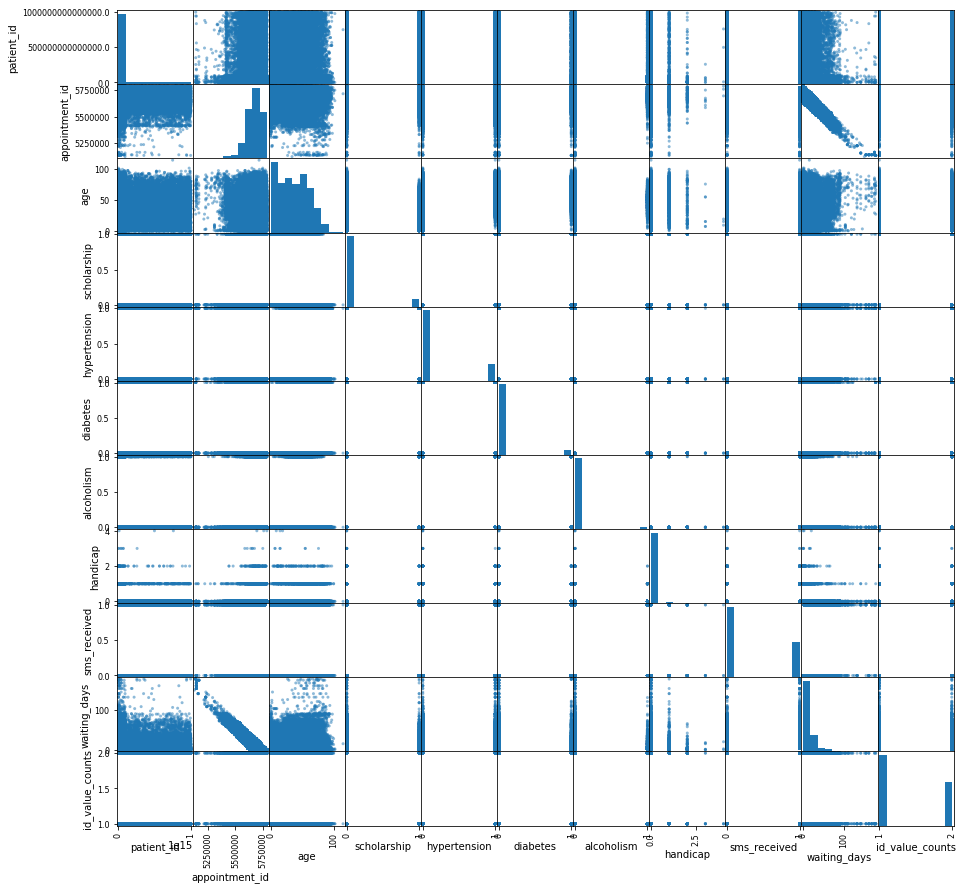

In [69]:
import pandas as pd
%matplotlib inline 
pd.plotting.scatter_matrix(df,figsize=(15,15));

# ***finding pattern***

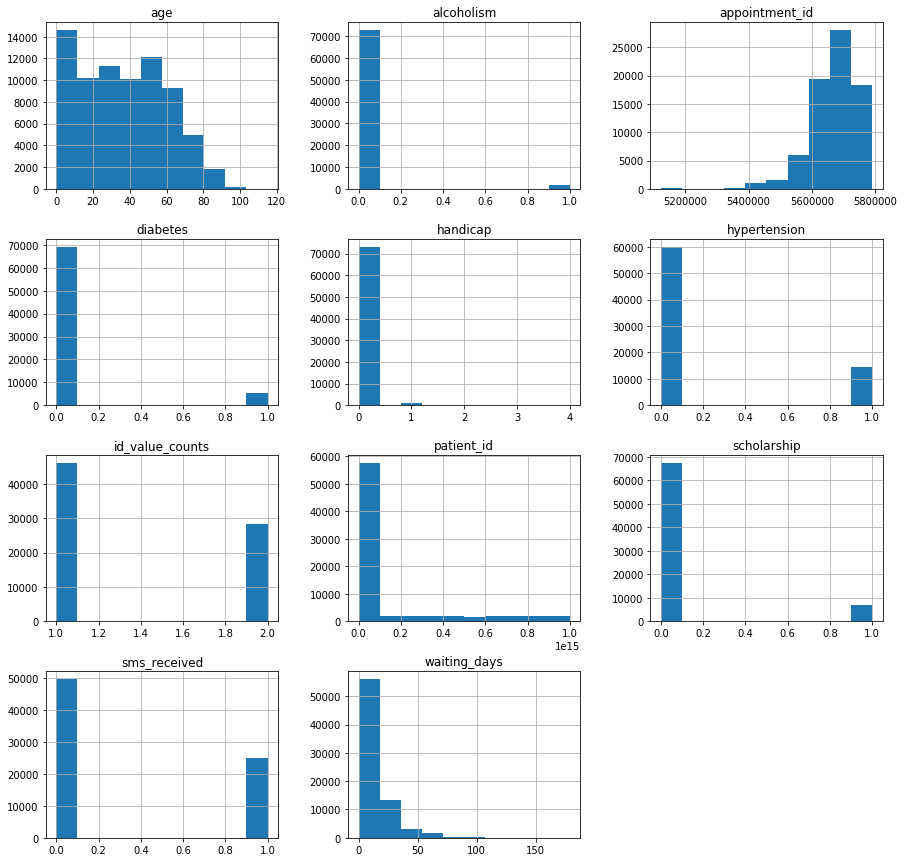

In [70]:
df.hist(figsize=(15,15));

# ***1- age study:***


<div class="alert alert-block alert-success">
<b>  Is there any relation between patient age and their commitment to appointment attendens?
</b> 
</div>

In [71]:
df.age.count()

74513

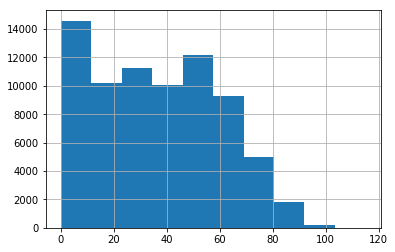

In [72]:
df.age.hist();

 
<div class="alert alert-block alert-info">
<b>
 separation and visualization of patients who show up according to their ages <br>

</div>

In [73]:
no_show_mask=df[df['no_show']== 'No']

In [74]:
print('Total number of patient who record Appointment Booking {} patient'.format(df.no_show.shape[0]))
print('Number of patient who show up from id :  {}  patient'.format(no_show_mask.shape[0]))
print('percent of patient who show up {}'.format(no_show_mask.shape[0]/(df.no_show.shape[0])*100))
print('percent of patient who were Not show up {} patient'.format((1-no_show_mask.shape[0]/(df.no_show.shape[0]))*100))

Total number of patient who record Appointment Booking 74513 patient
Number of patient who show up from id :  57785  patient
percent of patient who show up 77.55022613503684
percent of patient who were Not show up 22.449773864963163 patient


### ***visualize relationship***

In [75]:
from  matplotlib import pyplot
import seaborn as sns
sns.set(style='ticks')
%matplotlib inline

mal_noshow_zeroage=df[(df.age) & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age) & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total

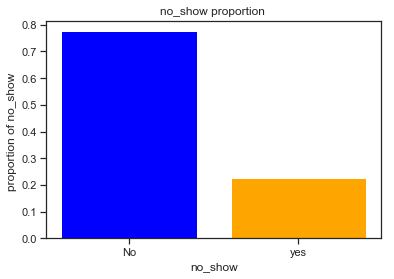

In [76]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

###### count number of patients who book appointments according to their ages

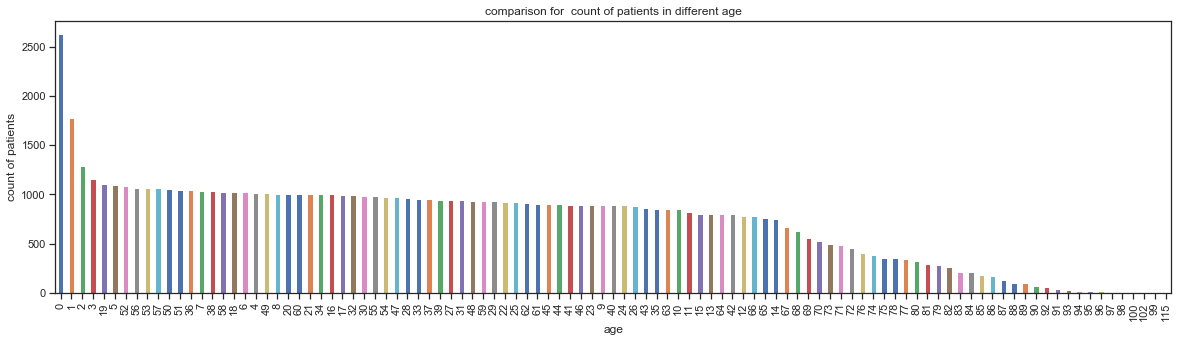

In [77]:
df.age.value_counts().plot(kind='bar',figsize=(20,5))
plt.title('comparison for  count of patients in different age')
plt.xlabel('age')
plt.ylabel('count of patients');

  
<div class="alert alert-block alert-info">
<b>
  find out trend lines of patient who show up and not show up according to their ages <br>

</div>

#### Bulding up new column to follow no_show counts in every patient's age  

In [78]:
counts_no_yes=df.groupby('age').no_show.value_counts()
counts_sorting=counts_no_yes.sort_values(ascending=True)
counts_sorting_to_fram=counts_sorting.to_frame(name='no_show_count')
merged = pd.merge(df, counts_sorting_to_fram, on='age',how='inner')

In [79]:
merged.shape

(149018, 19)

In [80]:
merged.drop_duplicates(['appointment_id'],inplace =True)

In [81]:
merged.shape

(74513, 19)

In [82]:
df=merged


## ***Trend lines of no_show according to patient's age factor***

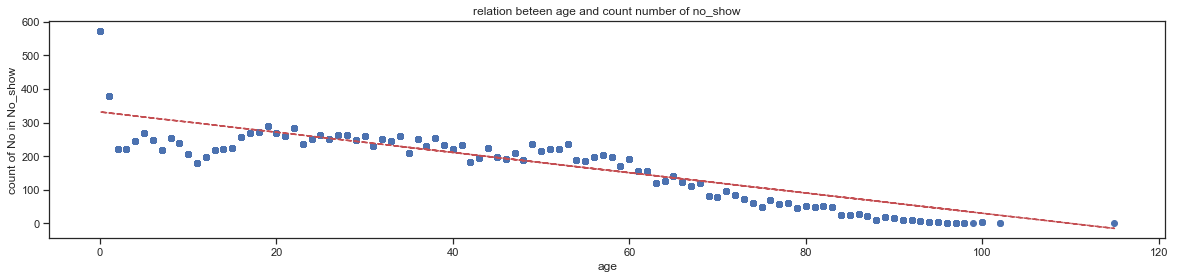

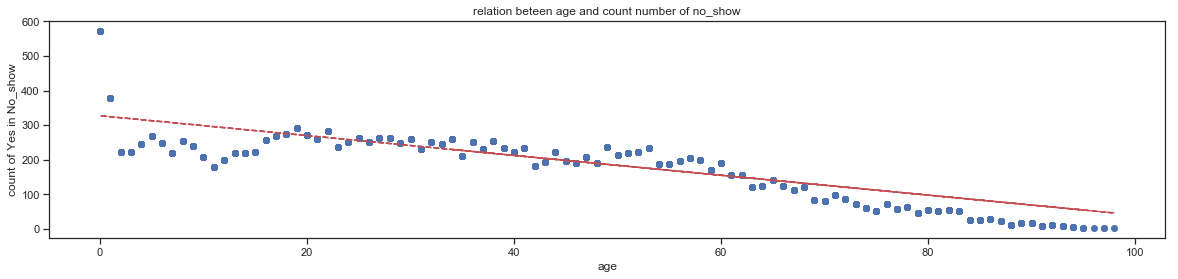

In [83]:
df_no=df[df['no_show']=='No'] 
plt.figure(figsize = (20,4))
x = df_no['age']
y = df_no['no_show_count']
plt.title('relation beteen age and count number of no_show')
plt.xlabel('age')
plt.ylabel('count of No in No_show')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()



df_yes=df[df['no_show']=='Yes'] 
plt.figure(figsize = (20,4))
x = df_yes['age']
y = df_yes['no_show_count']
plt.title('relation beteen age and count number of no_show')
plt.xlabel('age')
plt.ylabel('count of Yes in No_show')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

  
<div class="alert alert-block alert-info">
<b>
 from trend line we see: <br>
    
</div>
1. in general count number of patients who book appointment is inversely proportional to their age <br>
* there are some some periodes where the trend line is directrly proprtional to their age 

# ***build intution***

### we want to slice this big range according to different stage 


to study the relation between age and no_show first we need to clasify age in to groups

1. Fetus (Unborn)<br>
* Newborn (Birth - 1 month)<br>
* Baby (1 month and 1 day - 2 years)<br>
* Toddler (3 - 5)<br> 
* Kids (6 - 9)<br>
* Pre-Teen (10 - 12)<br>
* Teenager (13 - 17)<br>
* Young Adult (18 - 20)<br>
* Adult (21 - 39)<br>
* Young Middle-Aged Adult (40 - 49)<br>
* Middle-Aged Adult (50 - 54)<br>
* Very Young Senior Citizen (55 - 64)<br>
* Young Senior Citizen (65 - 74)<br>
* Senior Citizen (75 - 84)<br> 
* Old Senior Citizen (85+)



 
<div class="alert alert-block alert-info">
<b>
 Adding new coulmn to clasify patients into age stages <br>
    
</div>

In [84]:

# Bin edges that will be used to "cut" the data into groups
# we use -1 the start of sries to include babys with 0 age
bin_edges = [-1,3,6,10 ,13,18,21,40,50,55,65,75,85,116] # Fill in this list with five values you just found

# Labels for different age_stage groups
bin_names = ['Baby', 'Toddler','Kids', 'Pre-Teen', 'Teenager','Young_Adult','Adult','Young_Middle_Aged_Adult','Middle_Aged_Adult','Very_Young_Senior_Citizen','Young_Senior_Citizen', 'Senior_Citizen','Old_Senior_Citizen' ] # Name each age stage
# Creates age_stage column
df['age_stage'] = pd.cut(df['age'], bin_edges, labels=bin_names)

#df['age_stage']=df.loc['bin_edges','bin_names'] 
# Checks for successful creation of this column
df.head(3)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days,id_value_counts,no_show_count,age_stage
0,91637474953513,5122866,M,2015-12-03,2016-05-02,34,VILA RUBIM,0,1,0,0,0,1,Yes,Thursday,Monday,151,2,259,Adult
2,91637474953513,5648860,M,2016-05-02,2016-05-11,34,VILA RUBIM,0,1,0,0,0,1,Yes,Monday,Wednesday,9,2,259,Adult
4,35864643985587,5358168,F,2016-02-17,2016-05-05,34,RESISTÊNCIA,0,0,0,0,0,1,No,Wednesday,Thursday,78,1,259,Adult


In [85]:
# to confirm there is no null
df[df.age_stage.isnull()]

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days,id_value_counts,no_show_count,age_stage


In [86]:
df.isnull().sum()

patient_id              0
appointment_id          0
gender                  0
schedule_day            0
appointment_day         0
age                     0
neighborhood            0
scholarship             0
hypertension            0
diabetes                0
alcoholism              0
handicap                0
sms_received            0
no_show                 0
schedule_day_week       0
appointment_day_week    0
waiting_days            0
id_value_counts         0
no_show_count           0
age_stage               0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74513 entries, 0 to 149017
Data columns (total 20 columns):
patient_id              74513 non-null int64
appointment_id          74513 non-null int64
gender                  74513 non-null object
schedule_day            74513 non-null datetime64[ns]
appointment_day         74513 non-null datetime64[ns]
age                     74513 non-null int64
neighborhood            74513 non-null object
scholarship             74513 non-null int64
hypertension            74513 non-null int64
diabetes                74513 non-null int64
alcoholism              74513 non-null int64
handicap                74513 non-null int64
sms_received            74513 non-null int64
no_show                 74513 non-null object
schedule_day_week       74513 non-null object
appointment_day_week    74513 non-null object
waiting_days            74513 non-null int64
id_value_counts         74513 non-null int64
no_show_count           74513 non-null int64
age_stage   

# ***creat more and describtive feture***


 
<div class="alert alert-block alert-info">
<b>
 comparison for different age stages versuse no_show <br>
    
</div>

In [88]:
df.groupby('no_show').age_stage.count()

no_show
No     57785
Yes    16728
Name: age_stage, dtype: int64

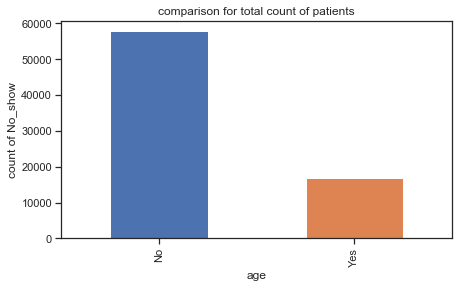

In [89]:
df.groupby('no_show').age_stage.count().plot(kind ='bar',figsize=(7,4))
plt.title('comparison for total count of patients')
plt.xlabel('age')
plt.ylabel('count of No_show');

In [90]:
print("proportion of `No_show` for age_stage  => {}".format(df.groupby('no_show').age_stage.count()/df.age_stage.count()))

proportion of `No_show` for age_stage  => no_show
No     0.775502
Yes    0.224498
Name: age_stage, dtype: float64


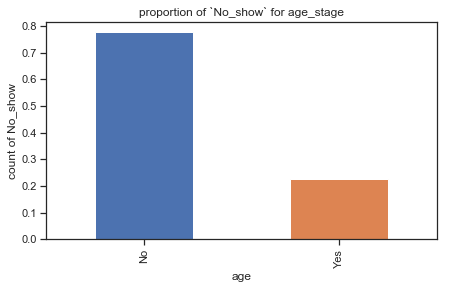

In [91]:
(df.groupby('no_show').age_stage.count()/df.age_stage.count()).plot(kind ='bar',figsize=(7,4))
plt.title('proportion of `No_show` for age_stage')
plt.xlabel('age')
plt.ylabel('count of No_show');

# ***sorting  data sets for different age stages*** 


In [92]:
df.age_stage.value_counts()

Adult                        17941
Very_Young_Senior_Citizen     9316
Young_Middle_Aged_Adult       9217
Baby                          6843
Young_Senior_Citizen          5350
Middle_Aged_Adult             5154
Teenager                      4579
Kids                          3785
Toddler                       3145
Young_Adult                   3115
Senior_Citizen                2869
Pre-Teen                      2402
Old_Senior_Citizen             797
Name: age_stage, dtype: int64

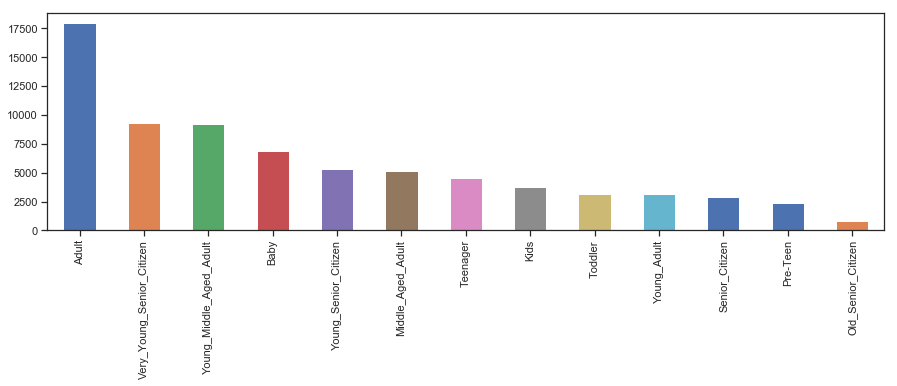

In [93]:
df['age_stage'].value_counts().plot(kind='bar',figsize=(15,4));

## ***comparison of counts of patients for no_show in different age_stage***

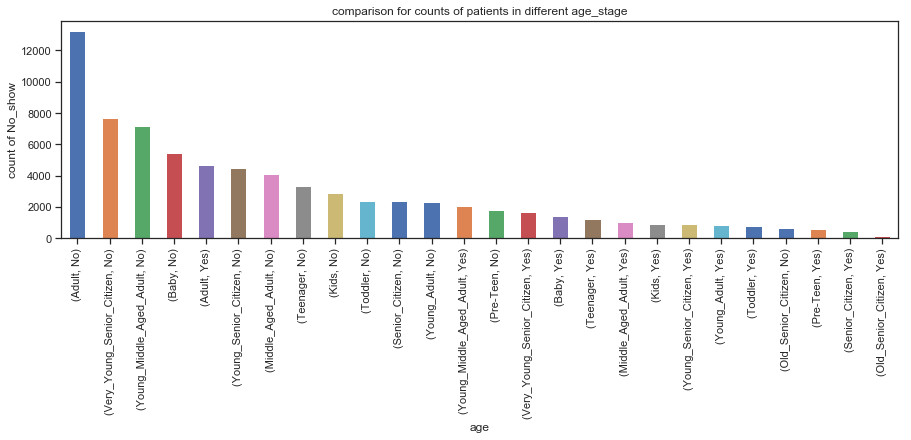

In [94]:
fr=df.groupby('age_stage').no_show.value_counts();
fr.sort_values(ascending=False).plot(kind='bar',figsize=(15,4))
plt.title('comparison for counts of patients in different age_stage')
plt.xlabel('age')
plt.ylabel('count of No_show');

## ***proportional comparison of counts of patients for no_show in different age_stage***

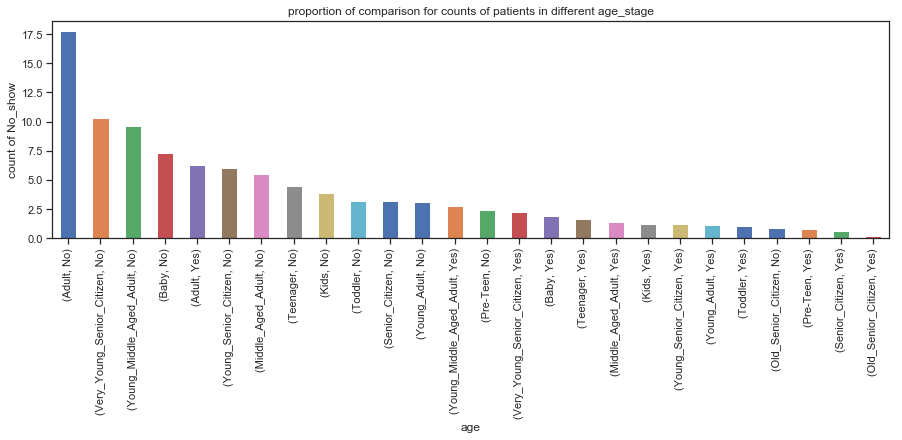

In [95]:
tr=((df.groupby('age_stage').no_show.value_counts())/df.age_stage.count())*100
tr.sort_values(ascending=False).plot(kind='bar',figsize=(15,4))
plt.title('proportion of comparison for counts of patients in different age_stage')
plt.xlabel('age')
plt.ylabel('count of No_show');


<div class="alert alert-block alert-info">
<b>
neumerical proportional comparison for count of patients versus no_show in different age_stage  <br>
    
</div>


In [96]:
tr=((df.groupby('age_stage').no_show.value_counts())/df.age_stage.count())*100
tr.sort_values(ascending=False)

age_stage                  no_show
Adult                      No         17.764685
Very_Young_Senior_Citizen  No         10.273375
Young_Middle_Aged_Adult    No          9.594299
Baby                       No          7.311476
Adult                      Yes         6.312992
Young_Senior_Citizen       No          5.996269
Middle_Aged_Adult          No          5.506422
Teenager                   No          4.478413
Kids                       No          3.846309
Toddler                    No          3.198100
Senior_Citizen             No          3.192731
Young_Adult                No          3.077315
Young_Middle_Aged_Adult    Yes         2.775355
Pre-Teen                   No          2.422396
Very_Young_Senior_Citizen  Yes         2.229141
Baby                       Yes         1.872157
Teenager                   Yes         1.666823
Middle_Aged_Adult          Yes         1.410492
Kids                       Yes         1.233342
Young_Senior_Citizen       Yes         1.183686
Young

# ***Adult age stage stage :***

In [97]:
mal_noshow_zeroage=df[(df.age_stage == 'Adult') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Adult') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in Adult stage   "No":{}'.format(proportion_no))
print('proportion of no_show in Adult  "Yes":{}'.format(proportion_yes))

proportion of no_show in Adult stage   "No":0.7378072571205618
proportion of no_show in Adult  "Yes":0.26219274287943817


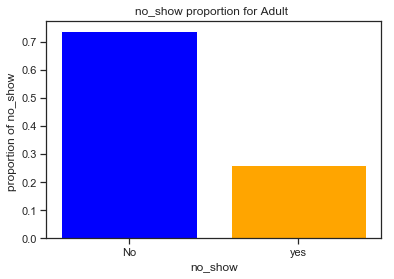

In [98]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for Adult ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Very_Young_Senior_Citizen:***

In [99]:
v_noshow=df[(df.age_stage == 'Very_Young_Senior_Citizen') & (df.no_show == 'No')].shape[0]
v_yesshow=df[(df.age_stage == 'Very_Young_Senior_Citizen') & (df.no_show == 'Yes')].shape[0]
total=v_noshow+v_yesshow
proportion_no=v_noshow/total
proportion_yes=v_yesshow/total
print('proportion of no_show in Adult stage   "No":{}'.format(proportion_no))
print('proportion of no_show in Adult  "Yes":{}'.format(proportion_yes))

proportion of no_show in Adult stage   "No":0.8217045942464577
proportion of no_show in Adult  "Yes":0.1782954057535423


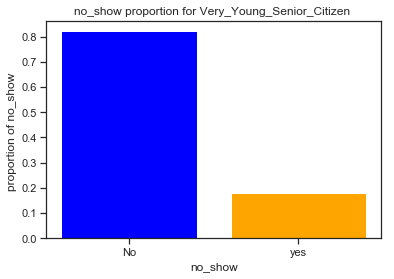

In [100]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for Very_Young_Senior_Citizen ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Young_Middle_Aged_Adult  age stage :***

In [101]:
mal_noshow_zeroage=df[(df.age_stage == 'Young_Middle_Aged_Adult') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Young_Middle_Aged_Adult') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in Adult stage   "No":{}'.format(proportion_no))
print('proportion of no_show in Adult  "Yes":{}'.format(proportion_yes))

proportion of no_show in Adult stage   "No":0.7756319843766952
proportion of no_show in Adult  "Yes":0.22436801562330477


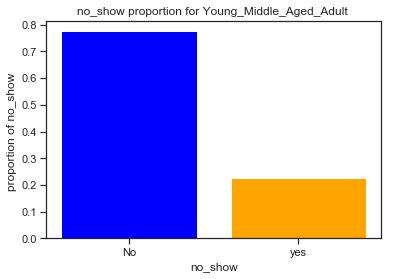

In [102]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color = colors)
plt.title("no_show proportion for Young_Middle_Aged_Adult ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Baby age stage :***

In [103]:
mal_noshow_zeroage=df[(df.age_stage == 'Baby') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Baby') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in Baby stage   "No":{}'.format(proportion_no))
print('proportion of no_show in Baby stage   "Yes":{}'.format(proportion_yes))

proportion of no_show in Baby stage   "No":0.7961420429636125
proportion of no_show in Baby stage   "Yes":0.20385795703638754


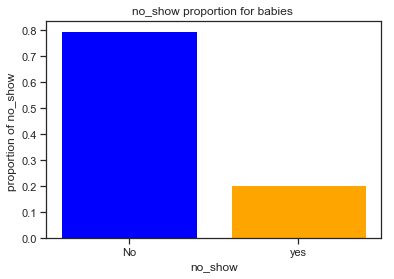

In [104]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for babies ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Young_Senior_Citizen :***

In [105]:
mal_noshow_zeroage=df[(df.age_stage == 'Young_Senior_Citizen') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Young_Senior_Citizen') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in baby stage   "No":{}'.format(proportion_no))
print('proportion of no_show in baby stage   "Yes":{}'.format(proportion_yes))

proportion of no_show in baby stage   "No":0.8351401869158879
proportion of no_show in baby stage   "Yes":0.16485981308411216


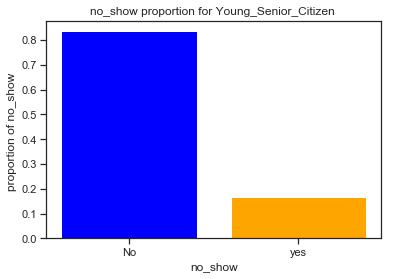

In [106]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for Young_Senior_Citizen ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Middle_Aged_Adult :***

In [107]:
mal_noshow_zeroage=df[(df.age_stage == 'Middle_Aged_Adult') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Middle_Aged_Adult') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in Middle_Aged_Adult stage   "No":{}'.format(proportion_no))
print('proportion of no_show in Middle_Aged_Adult stage   "Yes":{}'.format(proportion_yes))

proportion of no_show in Middle_Aged_Adult stage   "No":0.7960807140085371
proportion of no_show in Middle_Aged_Adult stage   "Yes":0.20391928599146295


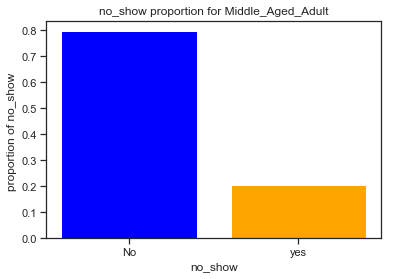

In [108]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for Middle_Aged_Adult")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Teenager :***

In [109]:
mal_noshow_zeroage=df[(df.age_stage == 'Teenager') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Teenager') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in Teenager stage   "No":{}'.format(proportion_no))
print('proportion of no_show in Teenager stage   "Yes":{}'.format(proportion_yes))

proportion of no_show in Teenager stage   "No":0.7287617383708234
proportion of no_show in Teenager stage   "Yes":0.2712382616291767


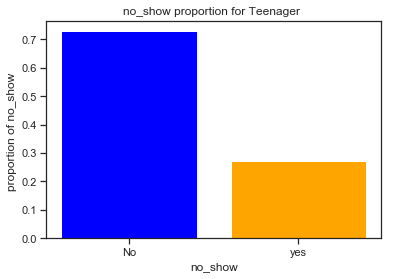

In [110]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for Teenager ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Kids :***

In [111]:
mal_noshow_zeroage=df[(df.age_stage == 'Kids') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Kids') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in Kid  stage   "No":{}'.format(proportion_no))
print('proportion of no_show in Kid  stage   "Yes":{}'.format(proportion_yes))

proportion of no_show in Kid  stage   "No":0.7571994715984148
proportion of no_show in Kid  stage   "Yes":0.2428005284015852


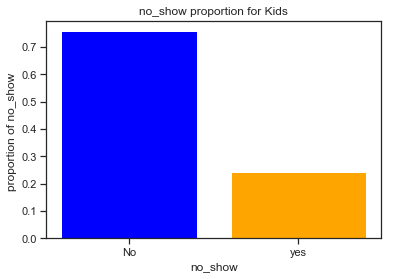

In [112]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for Kids")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Young_Adult  :***

In [113]:
mal_noshow_zeroage=df[(df.age_stage == 'Young_Adult') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Young_Adult') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in Young_Adult   stage   "No":{}'.format(proportion_no))
print('proportion of no_show in Young_Adult  stage   "Yes":{}'.format(proportion_yes))

proportion of no_show in Young_Adult   stage   "No":0.736115569823435
proportion of no_show in Young_Adult  stage   "Yes":0.263884430176565


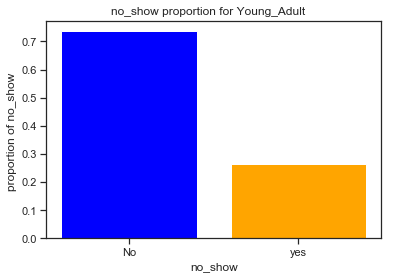

In [114]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for Young_Adult   ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Senior_Citizen :***

In [115]:
mal_noshow_zeroage=df[(df.age_stage == 'Senior_Citizen') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Senior_Citizen') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in Senior_Citizen  stage   "No":{}'.format(proportion_no))
print('proportion of no_show in Senior_Citizen  stage   "Yes":{}'.format(proportion_yes))

proportion of no_show in Senior_Citizen  stage   "No":0.8292087835482747
proportion of no_show in Senior_Citizen  stage   "Yes":0.17079121645172535


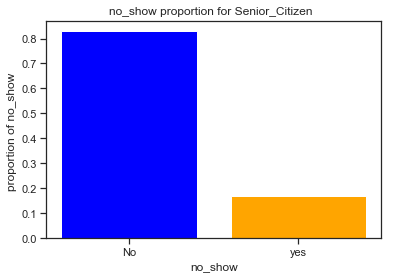

In [116]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for Senior_Citizen  ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Pre-Teen:***

In [117]:
mal_noshow_zeroage=df[(df.age_stage == 'Pre-Teen') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Pre-Teen') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in Pre-Teen   "No":{}'.format(proportion_no))
print('proportion of no_show in Pre-Teen   "Yes":{}'.format(proportion_yes))

proportion of no_show in Pre-Teen   "No":0.7514571190674438
proportion of no_show in Pre-Teen   "Yes":0.2485428809325562


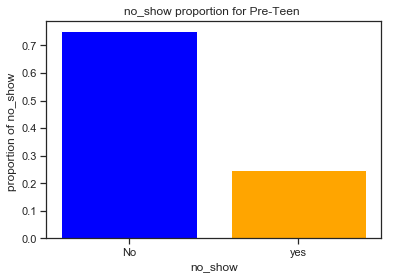

In [118]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for Pre-Teen ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");

# ***Old_Senior_Citizen :***

In [119]:
mal_noshow_zeroage=df[(df.age_stage == 'Old_Senior_Citizen') & (df.no_show == 'No')].shape[0]
mal_yesshow_zeroage=df[(df.age_stage == 'Old_Senior_Citizen') & (df.no_show == 'Yes')].shape[0]
total=mal_noshow_zeroage+mal_yesshow_zeroage
proportion_no=mal_noshow_zeroage/total
proportion_yes=mal_yesshow_zeroage/total
print('proportion of no_show in Old_Senior_Citizen  stage   "No":{}'.format(proportion_no))
print('proportion of no_show in Old_Senior_Citizen  stage   "Yes":{}'.format(proportion_yes))

proportion of no_show in Old_Senior_Citizen  stage   "No":0.8306148055207027
proportion of no_show in Old_Senior_Citizen  stage   "Yes":0.16938519447929737


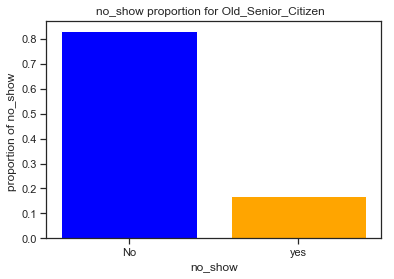

In [120]:
colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no, proportion_yes],color=colors)
plt.title("no_show proportion for Old_Senior_Citizen  ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");


<div class="alert alert-block alert-info">
<b>
  rankingof the percentage of the patients who will come to their appointment on time according to their age <br>
    
</div>

In [121]:
ranking= df.query('no_show=="No"').age_stage.value_counts()
rankin= df.age_stage.value_counts()
per=ranking/rankin*100 
per.sort_values(ascending=False)

Young_Senior_Citizen         83.514019
Old_Senior_Citizen           83.061481
Senior_Citizen               82.920878
Very_Young_Senior_Citizen    82.170459
Baby                         79.614204
Middle_Aged_Adult            79.608071
Young_Middle_Aged_Adult      77.563198
Toddler                      75.771065
Kids                         75.719947
Pre-Teen                     75.145712
Adult                        73.780726
Young_Adult                  73.611557
Teenager                     72.876174
Name: age_stage, dtype: float64

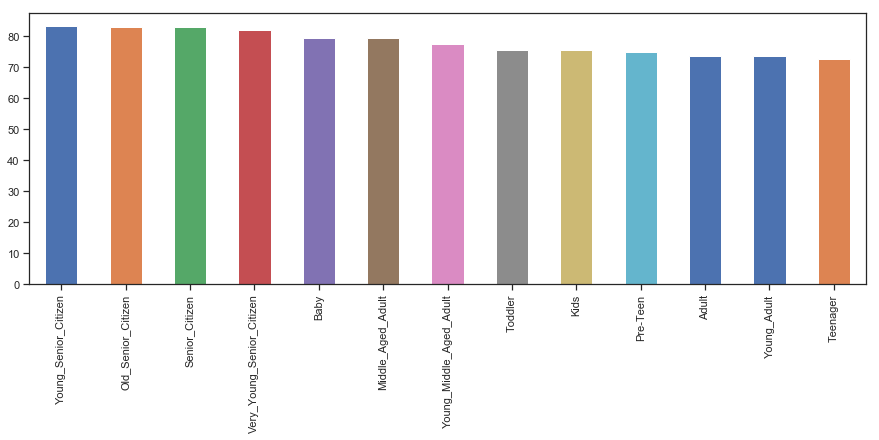

In [122]:
per.sort_values(ascending=False).plot(kind='bar',figsize=(15,5));

<div class="alert alert-block alert-info">
<b>
  rankingof the percentage of the patients who will not come to their appointment  according to their age <br>
    
</div>


In [123]:
ranking= df.query('no_show=="Yes"').age_stage.value_counts()
rankin= df.age_stage.value_counts()
per=ranking/rankin*100
per.sort_values(ascending=False)

Teenager                     27.123826
Young_Adult                  26.388443
Adult                        26.219274
Pre-Teen                     24.854288
Kids                         24.280053
Toddler                      24.228935
Young_Middle_Aged_Adult      22.436802
Middle_Aged_Adult            20.391929
Baby                         20.385796
Very_Young_Senior_Citizen    17.829541
Senior_Citizen               17.079122
Old_Senior_Citizen           16.938519
Young_Senior_Citizen         16.485981
Name: age_stage, dtype: float64

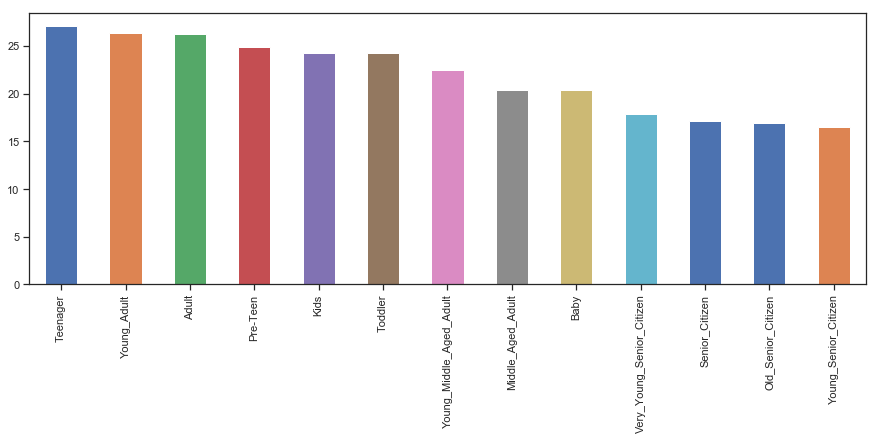

In [124]:
per.sort_values(ascending=False).plot(kind='bar',figsize=(15,5));

# ***conclusion :***

1. count number of patients who are bookig appointment in general is inversely proportional to their age which is not logic where the logic is as people become elder they will more expose to have diseases than youngers
* to discover the reason for that we need to see main clasification of peoples in Brazil
* patient with age more than or equal 55 years old have commitment for no_show appointment date more than 80% 
* Babies  with age less than 3 years old have commitment for no_show appointment date almost 80%
* patient with age range from 50 : 54  years old have commitment for no_show appointment date almost 80% 
* patient with age range from 3 : 12  years old have commitment for no_show appointment date more than 75% but less than 80%
*  patient with age range from 13 : 49  years old have commitment for no_show appointment date more than 70% and less than 75% 


<table>
       
| index |  age of patient | commitment for no_show appointment date |
|:-----:|:---------------:|:---------------------------------------:|
|   1   |   3 years old   |                   >80%                  |
|   2   | 50:54 years old |               almost =80%               |
|   3   |  3:12 years old |                 75%:80%                 |
|   4   | 13:49 years old |                 70%:75%                 |
   
</table>

In [125]:
df.head(3)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days,id_value_counts,no_show_count,age_stage
0,91637474953513,5122866,M,2015-12-03,2016-05-02,34,VILA RUBIM,0,1,0,0,0,1,Yes,Thursday,Monday,151,2,259,Adult
2,91637474953513,5648860,M,2016-05-02,2016-05-11,34,VILA RUBIM,0,1,0,0,0,1,Yes,Monday,Wednesday,9,2,259,Adult
4,35864643985587,5358168,F,2016-02-17,2016-05-05,34,RESISTÊNCIA,0,0,0,0,0,1,No,Wednesday,Thursday,78,1,259,Adult


# 2-waiting days study:



<div class="alert alert-block alert-success">
<b> Is there any  relationship of the waiting days between the schedule_day and appointment_day affect on the commitment to attends?
</b> 
</div>

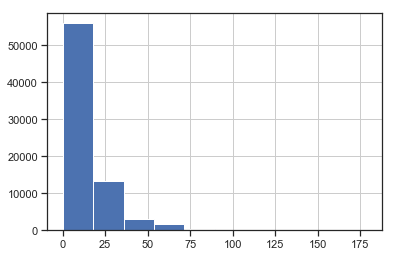

In [126]:
df.waiting_days.hist();

In [127]:
df.waiting_days.describe()

count    74513.000000
mean        11.273469
std         16.238094
min          0.000000
25%          0.000000
50%          4.000000
75%         17.000000
max        179.000000
Name: waiting_days, dtype: float64

<div class="alert alert-block alert-info">
<b>
   what we have ? <br>
    
</div>
<br>
1. **The range of waiting days start from 0 day up to 179 day which mean more than 4 monthes !!!** 
* **The good news is that 75% of waiting days is 17 days or less** 


### **To start analysis of relationshipe between waiting days and appointment attendens we need to answer**<br>
# what are the amjor priods for waiting days ? 


# ***1.visualize relationship***

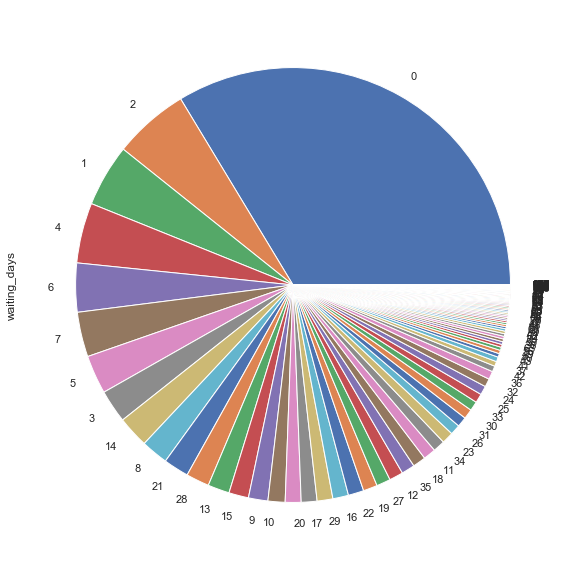

In [128]:
df.waiting_days.value_counts().plot(kind='pie',figsize=(25,10));

#### **what are the Descriptive statistics of waiting days more than 17 day which is equal to 75% of waiting days of data**

In [129]:
df.query('waiting_days>17').describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,waiting_days,id_value_counts,no_show_count
count,1.855300e+04,1.855300e+04,18553.000000,18553.000000,18553.000000,18553.000000,18553.000000,18553.000000,18553.000000,18553.000000,18553.000000,18553.000000
mean,1.470247e+14,5.589674e+06,36.330405,0.083868,0.161753,0.052175,0.017787,0.012343,0.611276,34.063602,1.335094,223.901202
std,2.542109e+14,7.881323e+04,23.380833,0.277197,0.368234,0.222385,0.132180,0.122451,0.487474,17.202653,0.472036,96.222412
min,2.263866e+07,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000
25%,4.335675e+12,5.551333e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.000000,191.000000
50%,3.287563e+13,5.596419e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,1.000000,222.000000
75%,9.493294e+13,5.639678e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.000000,2.000000,253.000000
max,9.997482e+14,5.728757e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,2.000000,573.000000


 

<div class="alert alert-block alert-info">
<b>
filtering the data based on waiting days less than or equal 37 days which is equal to 93.75% of total data*  <br>
    
</div>


In [130]:
df_37=df[df['waiting_days']<=37]

In [131]:
no_show_mask_37=df_37[df_37['no_show']== 'No']
no_show_mask_37.shape

(54722, 20)

In [132]:
print('Total number of patient who have waiting days upto 37 days are {} patient'.format(df_37.waiting_days.shape[0]))
print('Number of patient who show up  :  {}  patient'.format(no_show_mask_37.shape[0]))
print('percent of patient who show up {}'.format(no_show_mask_37.shape[0]/(df_37.waiting_days.shape[0])*100))
print('percent of patient who were Not show up {} patient'.format((1-no_show_mask_37.shape[0]/(df_37.waiting_days.shape[0]))*100))

Total number of patient who have waiting days upto 37 days are 69922 patient
Number of patient who show up  :  54722  patient
percent of patient who show up 78.2614913761048
percent of patient who were Not show up 21.738508623895203 patient


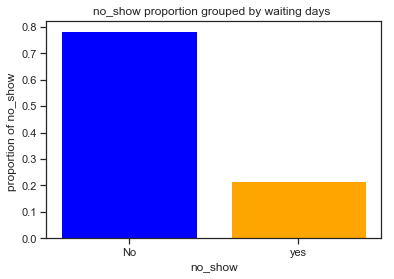

In [133]:
mal_noshow_37=df[(df.waiting_days<37) & (df.no_show == 'No')].shape[0]
mal_yesshow_37=df[(df.waiting_days<37) & (df.no_show =='Yes')].shape[0]
total=mal_noshow_37+mal_yesshow_37
proportion_no_37=mal_noshow_37/total
proportion_yes_37=mal_yesshow_37/total

colors=['blue','orange']
plt.bar(["No", "yes"], [proportion_no_37, proportion_yes_37],color=colors)
plt.title("no_show proportion grouped by waiting days ")
plt.xlabel("no_show")
plt.ylabel("proportion of no_show ");


## ***count number of patients who book appointments according to waiting days***

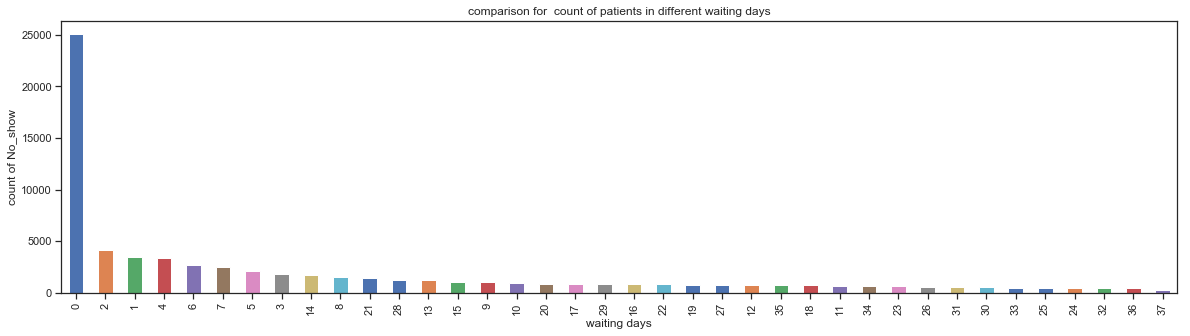

In [134]:
df_37.waiting_days.value_counts().plot(kind='bar',figsize=(20,5))
plt.title('comparison for  count of patients in different waiting days')
plt.xlabel('waiting days')
plt.ylabel('count of No_show');

### ***find out trend lines of patient who show up and not show up according to waiting days***

## ***Trend lines of no_show according to patient's waiting days factor***

## ***Bulding up new column to follow no_show counts for every patient's waiting days***

In [135]:
counts_no_yes=df.groupby('waiting_days').no_show.value_counts()
counts_sorting=counts_no_yes.sort_values(ascending=True)
counts_sorting_to_fram=counts_sorting.to_frame(name='no_show_count_waiting_days')
merged = pd.merge(df, counts_sorting_to_fram, on='waiting_days',how='inner')


In [136]:
merged.shape

(148973, 21)

In [137]:
merged.drop_duplicates(['appointment_id'],inplace =True)

In [138]:
merged.shape

(74513, 21)

In [139]:
df=merged

In [140]:
df_37=df[df['waiting_days']<=37]

In [141]:
df_no=df_37[df_37['no_show']=='No']

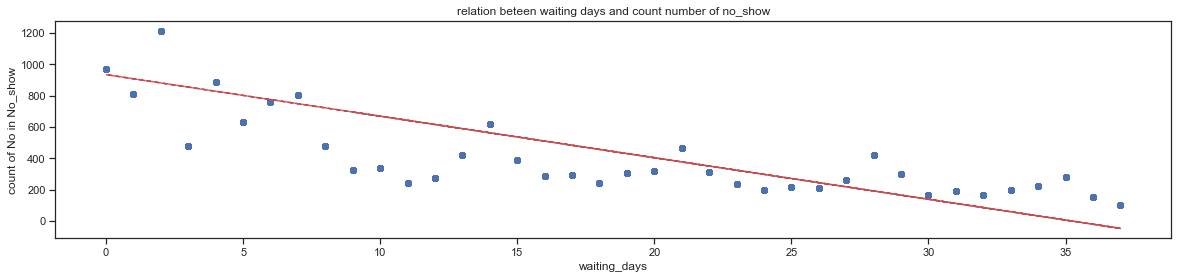

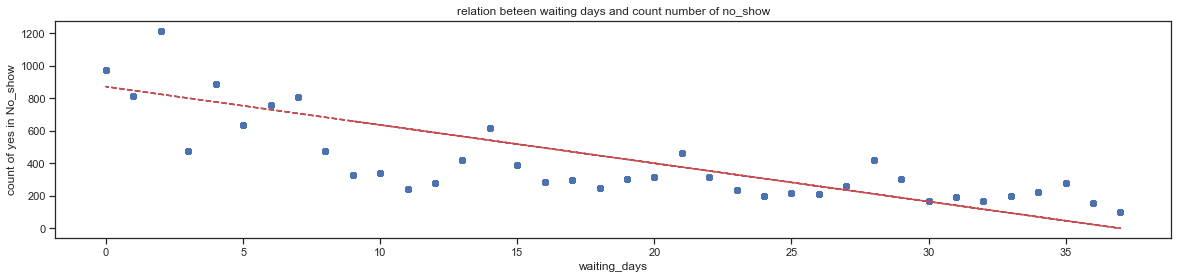

In [142]:
df_no=df_37[df_37['no_show']=='No']
plt.figure(figsize = (20,4))
x = df_no['waiting_days']
y = df_no['no_show_count_waiting_days']
plt.title('relation beteen waiting days and count number of no_show')
plt.xlabel('waiting_days')
plt.ylabel('count of No in No_show')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()


df_no=df_37[df_37['no_show']=='Yes']
plt.figure(figsize = (20,4))
x = df_no['waiting_days']
y = df_no['no_show_count_waiting_days']
plt.title('relation beteen waiting days and count number of no_show')
plt.xlabel('waiting_days')
plt.ylabel('count of yes in No_show')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()




<div class="alert alert-block alert-info">
<b>
   from trend lines we see <br>
    
</div>

### 1- in general count number of patients who show up is inversely proportional to their waiting days 
### 2- there are some some periodes where the trend line is directrly proprtional to their waiting days

#### we want to slice this  range according to different stageto study the relation between waiting days and no_show 


# ***2.build intution***

# clasify waiting days in to different groups 
The will be divided into 2 groups where 0 day mean today or in other words schedual day is appointment day<br>
there are 11 group to cover the data range of waiting days<br>
A:(0:2)waiting dayes<br>
B:(3:6)waiting dayes<br>
C:(7:9)waiting dayes<br>
D:(10:13)waiting dayes<br>
E:(14:16)waiting dayes<br>
F:(17:20)waiting dayes<br>
G:(21:23)waiting dayes<br>
H:(24:27)waiting dayes<br>
I:(28:30)waiting dayes<br>
J:(31:34)waiting dayes<br>
K:(35:37)waiting dayes<br>

___

# ***comparison for different waiting days periodes versuse no_show***

In [143]:
# Bin edges that will be used to "cut" the data into groups
# we use -1 the start of sries to include  0 day
bin_edges = [-1,3,7,10,14,17,21,24,28,31,35,38] # list for range of waiting days 
# Labels for different age_stage groups
bin_names = ['A','B','C','D','E','F','G','H','I','J','K'] # Name each waiting period
# Creates waiting_days_period column
df['waiting_days_periodes'] = pd.cut(df['waiting_days'], bin_edges, labels=bin_names )
# Checks for successful creation of this column on 37 waiting days data frame
df_37=df[df['waiting_days']<=37]
df_37.head(100)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,...,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days,id_value_counts,no_show_count,age_stage,no_show_count_waiting_days,waiting_days_periodes
1,91637474953513,5648860,M,2016-05-02,2016-05-11,34,VILA RUBIM,0,1,0,...,1,Yes,Monday,Wednesday,9,2,259,Adult,325,C
3,94791461376591,5626367,F,2016-04-27,2016-05-06,34,RESISTÊNCIA,1,0,0,...,1,No,Wednesday,Friday,9,2,259,Adult,325,C
5,885182199446541,5607910,M,2016-04-20,2016-04-29,34,JOANA D´ARC,0,0,0,...,1,No,Wednesday,Friday,9,1,259,Adult,325,C
7,91581872616666,5605581,F,2016-04-20,2016-04-29,34,JABOUR,0,0,0,...,1,Yes,Wednesday,Friday,9,2,259,Adult,325,C
9,274726472366828,5604145,F,2016-04-20,2016-04-29,34,FORTE SÃO JOÃO,0,0,0,...,1,Yes,Wednesday,Friday,9,2,259,Adult,325,C
11,993367389881,5614782,F,2016-04-25,2016-05-04,34,BENTO FERREIRA,0,0,0,...,1,Yes,Monday,Wednesday,9,1,259,Adult,325,C
13,894684839917,5620979,M,2016-04-26,2016-05-05,34,DA PENHA,0,0,0,...,1,No,Tuesday,Thursday,9,1,259,Adult,325,C
15,91396129147454,5625472,M,2016-04-27,2016-05-06,34,ILHA DO PRÍNCIPE,0,0,0,...,1,No,Wednesday,Friday,9,2,259,Adult,325,C
17,275921642384699,5729723,F,2016-05-24,2016-06-02,34,ILHA DO PRÍNCIPE,0,0,0,...,1,No,Tuesday,Thursday,9,2,259,Adult,325,C
19,33796711324618,5675853,F,2016-05-09,2016-05-18,34,JARDIM CAMBURI,0,0,0,...,0,Yes,Monday,Wednesday,9,2,259,Adult,325,C


In [144]:
df_37.groupby('no_show').waiting_days_periodes.count()

no_show
No     54722
Yes    15200
Name: waiting_days_periodes, dtype: int64

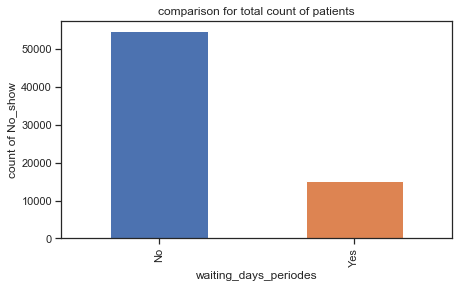

In [145]:
df_37.groupby('no_show').waiting_days_periodes.count().plot(kind ='bar',figsize=(7,4));
plt.title('comparison for total count of patients')
plt.xlabel('waiting_days_periodes')
plt.ylabel('count of No_show');

In [146]:
print("proportion of `No_show` for waiting_days_periodes  => {}".format(df_37.groupby('no_show').waiting_days_periodes.count()/df_37.waiting_days_periodes.count()))

proportion of `No_show` for waiting_days_periodes  => no_show
No     0.782615
Yes    0.217385
Name: waiting_days_periodes, dtype: float64


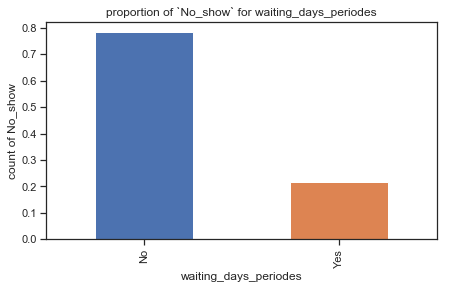

In [147]:
(df_37.groupby('no_show').waiting_days_periodes.count()/df_37.waiting_days_periodes.count()).plot(kind ='bar',figsize=(7,4))
plt.title('proportion of `No_show` for waiting_days_periodes')
plt.xlabel('waiting_days_periodes')
plt.ylabel('count of No_show');

# ***sorting data sets for different waiting_days_periodes***

In [148]:
df_37.waiting_days_periodes.value_counts()

A    34539
B    10662
D     4402
F     3786
C     3524
H     3127
E     2833
J     2371
G     1999
I     1964
K      715
Name: waiting_days_periodes, dtype: int64

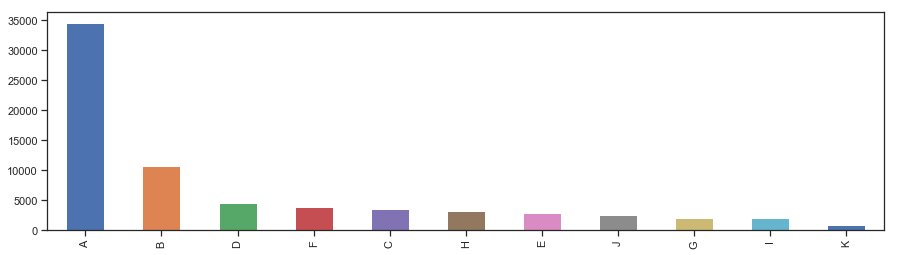

In [149]:
df_37['waiting_days_periodes'].value_counts().plot(kind='bar',figsize=(15,4));

## ***comparison of counts of patients for no_show in different waiting_days_periodes***

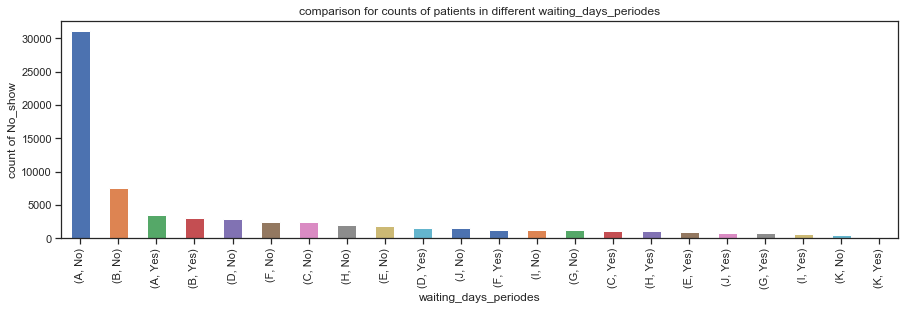

In [150]:
fr=df_37.groupby('waiting_days_periodes').no_show.value_counts();
fr.sort_values(ascending=False).plot(kind='bar',figsize=(15,4))
plt.title('comparison for counts of patients in different waiting_days_periodes')
plt.xlabel('waiting_days_periodes')
plt.ylabel('count of No_show');

### proportional comparison of counts of patients for no_show in different waiting_days_periodes

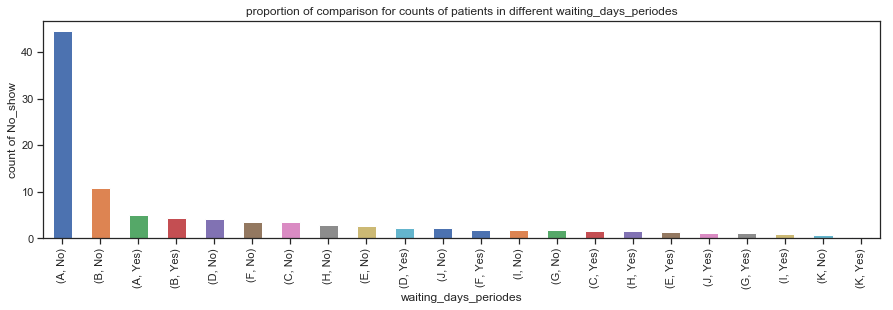

In [151]:
tr=((df_37.groupby('waiting_days_periodes').no_show.value_counts())/df_37.age_stage.count())*100
tr.sort_values(ascending=False).plot(kind='bar',figsize=(15,4))
plt.title('proportion of comparison for counts of patients in different waiting_days_periodes')
plt.xlabel('waiting_days_periodes')
plt.ylabel('count of No_show');



<div class="alert alert-block alert-info">
<b>
neumerical proportional comparison for count of patients versus no_show in different waiting_days_periodes  <br>
    
</div>


In [152]:
tr=((df_37.groupby('waiting_days_periodes').no_show.value_counts())/df_37.waiting_days_periodes.count())*100
tr.sort_values(ascending=False)

waiting_days_periodes  no_show
A                      No         44.428077
B                      No         10.844942
A                      Yes         4.968393
B                      Yes         4.403478
D                      No          4.067389
F                      No          3.511055
C                      No          3.410944
H                      No          2.884643
E                      No          2.658677
D                      Yes         2.228197
J                      No          2.145248
F                      Yes         1.903550
I                      No          1.864935
G                      No          1.787706
C                      Yes         1.628958
H                      Yes         1.587483
E                      Yes         1.392981
J                      Yes         1.245674
G                      Yes         1.071194
I                      Yes         0.943909
K                      No          0.657876
                       Yes         0.364692
N

# ***3.creat more and describtive feture***



<div class="alert alert-block alert-info">
<b> rankingof the percentage of the patients who will come to their appointment on time according to their waiting_days_periodes  <br>
    
</div>


In [153]:
ranking= df_37.query('no_show=="No"'). waiting_days_periodes.value_counts()
rankin= df_37. waiting_days_periodes.value_counts()
per1=ranking/rankin*100 
per1.sort_values(ascending=False)


A    89.941805
B    71.121741
C    67.678774
I    66.395112
E    65.619485
F    64.844163
D    64.606997
H    64.502718
K    64.335664
J    63.264445
G    62.531266
Name: waiting_days_periodes, dtype: float64

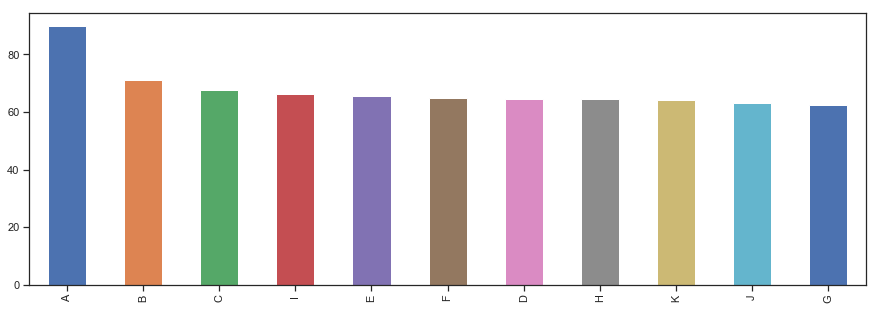

In [154]:
per1.sort_values(ascending=False).plot(kind='bar',figsize=(15,5));


<div class="alert alert-block alert-info">
<b> rankingof the percentage of the patients who will not come to their appointment on time according to their waiting_days_periodes  <br>
    
</div>


In [155]:
ranking= df_37.query('no_show=="Yes"').waiting_days_periodes.value_counts()
rankin= df_37.waiting_days_periodes.value_counts()
per2=ranking/rankin*100 
per2.sort_values(ascending=False)

G    37.468734
J    36.735555
K    35.664336
H    35.497282
D    35.393003
F    35.155837
E    34.380515
I    33.604888
C    32.321226
B    28.878259
A    10.058195
Name: waiting_days_periodes, dtype: float64

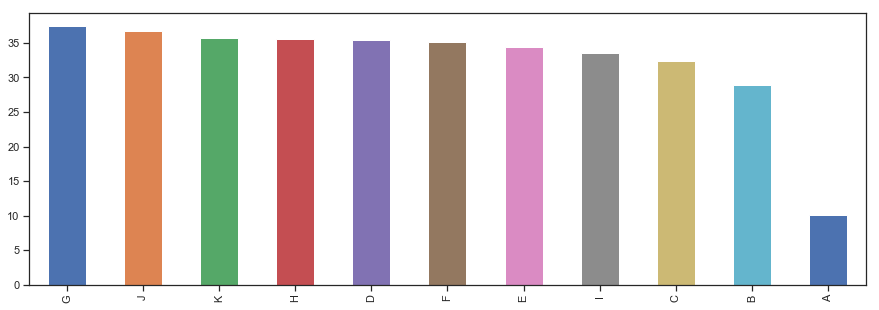

In [156]:
per2.sort_values(ascending=False).plot(kind='bar',figsize=(15,5));


# ***4.conclusion :***<br> 
    
count number of patients who are bookig appointment in general is inversely proportional to their waiting days which is logic<br>  
1. patient who wait from 0:2 dayes they have  commitment for no_show appointment date almost 90%<br> 
* patient who wait from 3:6 dayes  the commitment for no_show appointment date drpoed to 71,12%<br> 
* patient who wait from 7:9 dayes they have  commitment for no_show appointment date almost 67.67%<br> 
### surprse 1:<br>     
* patient who wait from 28:30 dayes  have  commitment for no_show appointment date almost 66.39% which is not logic so those patients need more investigation!!!<br> 
* patient who wait from 14:16 dayes they have  commitment for no_show appointment date almost  65.61%<br> 
* patient who wait from 17:20 dayes they have  commitment for no_show appointment date almost 64.84%<br> 
### surprise2: <br>    
* patient who wait from 10:13 dayes  have  commitment for no_show appointment date almost 64.60% which is not logic so those patients need more investigation!!!<br>     
* patient who wait from 24:27 dayes they have  commitment for no_show appointment date almost  64.50% <br> 
### surprise3:<br>     
* patient who wait from 35:37 dayes they have  commitment for no_show appointment date almost  64.33%  which is not logic so those patients need more investigation!!! <br>  
* patient who wait from 31:34 dayes they have  commitment for no_show appointment date almost  63.26%<br> 
### surprise4:<br>     
* patient who wait from 21:23 dayes they have  commitment for no_show appointment date almost   62.53%  which is not logic so those patients need more investigation!!!<br>       

# ***NOTES:***<br>

1. patient who wait from 28:30 dayes  have  commitment for no_show appointment date almost 66.39%  <br> 
* patient who wait from 10:13 dayes  have  commitment for no_show appointment date almost 64.60% <br> 
* patient who wait from 35:37 dayes they have  commitment for no_show appointment date almost  64.33%<br>     
* patient who wait from 21:23 dayes they have  commitment for no_show appointment date almost   62.53% <br> 

###### ***NOTE:***
***PERIOD BETWEEN 28:37 WAITING DAYS have commitment for no_show appointment date  MORE THAN PERIOD BETWEEN 10:23 WAITING DAYS***<br> 
***THAT MEAN ending and starting of month better than middel of the month may be that related to financial reasons***<br>             

# ***3- gender study:***


<div class="alert alert-block alert-info">
<b>Is there any relation between patients gender and their commitment to appointment attendens? </b>
</div>


In [157]:
df.head(3)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,...,sms_received,no_show,schedule_day_week,appointment_day_week,waiting_days,id_value_counts,no_show_count,age_stage,no_show_count_waiting_days,waiting_days_periodes
0,91637474953513,5122866,M,2015-12-03,2016-05-02,34,VILA RUBIM,0,1,0,...,1,Yes,Thursday,Monday,151,2,259,Adult,1,NaN
1,91637474953513,5648860,M,2016-05-02,2016-05-11,34,VILA RUBIM,0,1,0,...,1,Yes,Monday,Wednesday,9,2,259,Adult,325,C
3,94791461376591,5626367,F,2016-04-27,2016-05-06,34,RESISTÊNCIA,1,0,0,...,1,No,Wednesday,Friday,9,2,259,Adult,325,C



 
<div class="alert alert-block alert-info">
<b>Note we have Nan values in waiting_dayes_periodes those NaN are for patient's waiting days more than 37 days here we need not to drop them</b>
</div>


In [158]:
df.gender.describe()

count     74513
unique        2
top           F
freq      48113
Name: gender, dtype: object

In [159]:
df_fem=df[df['gender']=='F']
df_mal=df[df['gender']=='M']

In [160]:
f_count=df_fem.gender.count()
m_count=df_mal.gender.count()

In [161]:
print('Total number of patient according to gender who record Appointment Booking {} patient in cleand data'.format(df.gender.shape[0]))
print('Number of femal patients :  ({})  patient'.format(df_fem.gender.count()))
print('Number of male patients :  ({})  patient'.format(df_mal.gender.count()))
print('percent of patient who are femals ({}) patient'.format(df_fem.gender.count()/(df.gender.shape[0])*100))
print('percent of patient who are male ({}) patient'.format(df_mal.gender.count()/(df.gender.shape[0])*100))

Total number of patient according to gender who record Appointment Booking 74513 patient in cleand data
Number of femal patients :  (48113)  patient
Number of male patients :  (26400)  patient
percent of patient who are femals (64.5699408156966) patient
percent of patient who are male (35.43005918430341) patient


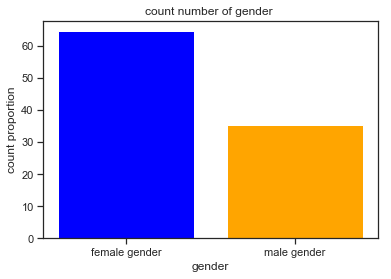

In [162]:
total=df.gender.shape[0]
f_count=df_fem.gender.count()
m_count=df_mal.gender.count()
proportion_f=df_fem.gender.count()/(df.gender.shape[0])*100
proportion_m=df_mal.gender.count()/(df.gender.shape[0])*100
colors=['blue','orange']
plt.bar(["female gender", "male gender"], [proportion_f, proportion_m],color=colors)
plt.title("count number of gender ")
plt.xlabel("gender")
plt.ylabel("count proportion");

# ***3.1visualize relationship***

In [163]:
df.groupby(['gender','no_show']).count().age

gender  no_show
F       No         37263
        Yes        10850
M       No         20522
        Yes         5878
Name: age, dtype: int64

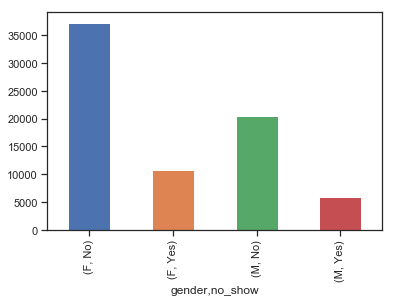

In [164]:
%matplotlib inline
df.groupby(['gender','no_show']).count().age.plot(kind='bar');

In [165]:
df.groupby(['gender','no_show']).age.mean()

gender  no_show
F       No         39.074336
        Yes        35.392995
M       No         33.506042
        Yes        30.577067
Name: age, dtype: float64

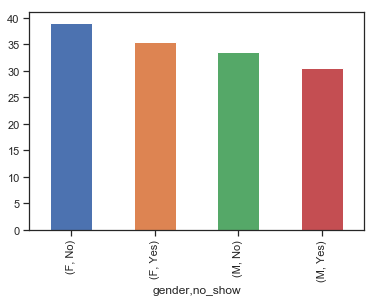

In [166]:
%matplotlib inline
df.groupby(['gender','no_show']).mean().age.plot(kind='bar');

In [167]:
df_fem.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,waiting_days,id_value_counts,no_show_count,no_show_count_waiting_days
count,4.811300e+04,4.811300e+04,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000
mean,1.465371e+14,5.670341e+06,38.244154,0.120778,0.210941,0.075634,0.014570,0.015651,0.348617,11.494253,1.394654,217.605491,664.309417
std,2.546707e+14,7.501131e+04,22.607687,0.325873,0.407981,0.264415,0.119824,0.133481,0.476537,16.434606,0.488781,87.657422,344.939596
min,3.921700e+04,5.134197e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.175523e+12,5.633821e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,189.000000,317.000000
50%,3.177683e+13,5.676820e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,222.000000,805.000000
75%,9.452868e+13,5.722532e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,2.000000,253.000000,971.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,2.000000,573.000000,1215.000000


In [168]:
df_mal.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,waiting_days,id_value_counts,no_show_count,no_show_count_waiting_days
count,2.640000e+04,2.640000e+04,26400.000000,26400.000000,26400.000000,26400.000000,26400.000000,26400.000000,26400.000000,26400.000000,26400.000000,26400.000000,26400.000000
mean,1.479267e+14,5.672167e+06,32.853902,0.049091,0.162689,0.060492,0.040606,0.024205,0.312197,10.871098,1.357765,230.625114,677.964962
std,2.540771e+14,7.302544e+04,24.656537,0.216062,0.369089,0.238401,0.197380,0.173812,0.463398,15.866111,0.479352,103.719052,344.448951
min,4.374100e+04,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.277600e+12,5.636682e+06,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,191.000000,317.000000
50%,3.324355e+13,5.677842e+06,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,222.000000,811.000000
75%,9.555055e+13,5.723331e+06,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.000000,2.000000,255.000000,971.000000
max,9.999465e+14,5.790466e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,2.000000,573.000000,1215.000000


<table>

 | index                    	| femal geder 	| male gender 	|
 |--------------------------	|-------------	|-------------	|
 |  age mean                	| 38.24       	| 32.8        	|
 |  age range               	| 0 upto 115  	| 0 upto 100  	|
 | 75% of data under age of 	| 56          	| 54          	|

<table><br>



# ***3.2build intution***

___
# ***what is age distribution for both males and females***

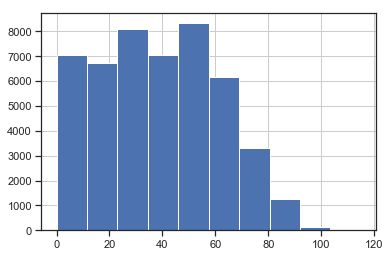

In [169]:
# female age distribution
df_fem.age.hist();

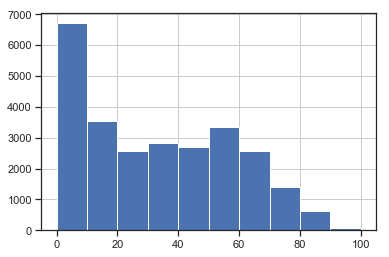

In [170]:
#male age distribution
df_mal.age.hist();



<div class="alert alert-block alert-info">
<b>Note</b>
</div>
1. in general females are more healthy than males in data we have where the age mean in femals greater than males and max.age in females greater than male<br>
*  age distribution for male and females clarify that Females are more concerned with their health more than males
* To study if there is any relation between gender versuse no_show we will clasify this two groups according to their age<br> 


<div class="alert alert-block alert-info">
<b>what is the trend comparison between females and males who are  show up according to their ages </b>
</div>

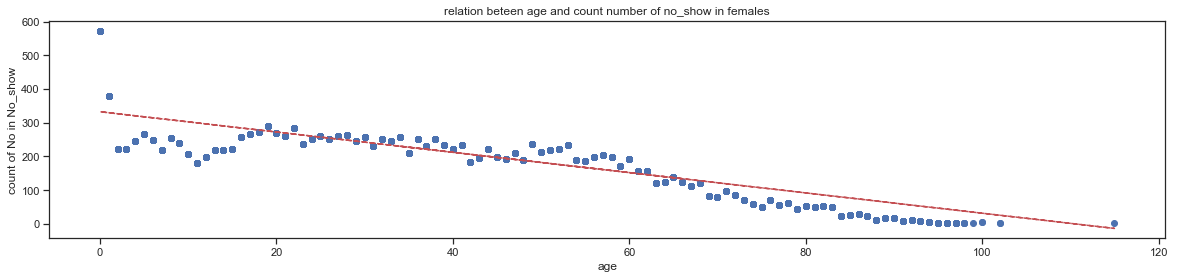

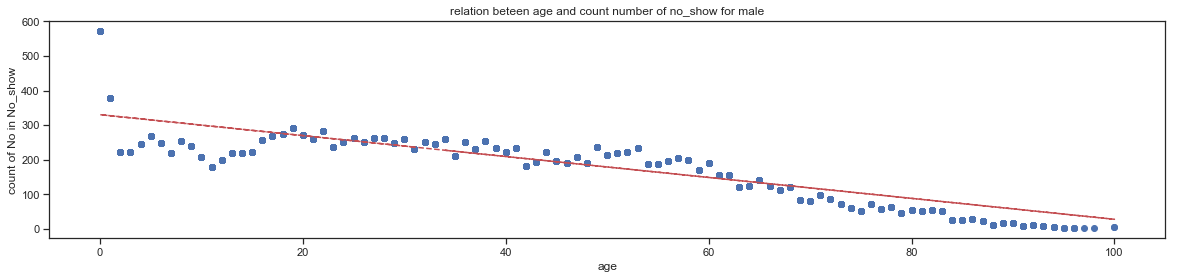

In [171]:
#femal trend
df_fem_no=df[(df.no_show == 'No') & (df.gender =='F')]
plt.figure(figsize = (20,4))
x = df_fem_no['age']
y = df_fem_no['no_show_count']
plt.title('relation beteen age and count number of no_show in females')
plt.xlabel('age')
plt.ylabel('count of No in No_show')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()



#male trend
df_mal_no=df[(df.no_show == 'No') & (df.gender =='M')] 
plt.figure(figsize = (20,4))
x = df_mal_no['age']
y = df_mal_no['no_show_count']
plt.title('relation beteen age and count number of no_show for male')
plt.xlabel('age')
plt.ylabel('count of No in No_show')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()




<div class="alert alert-block alert-info">
<b>what is the trend comparison between females and males who are not  show up according to their ages </b>
</div>

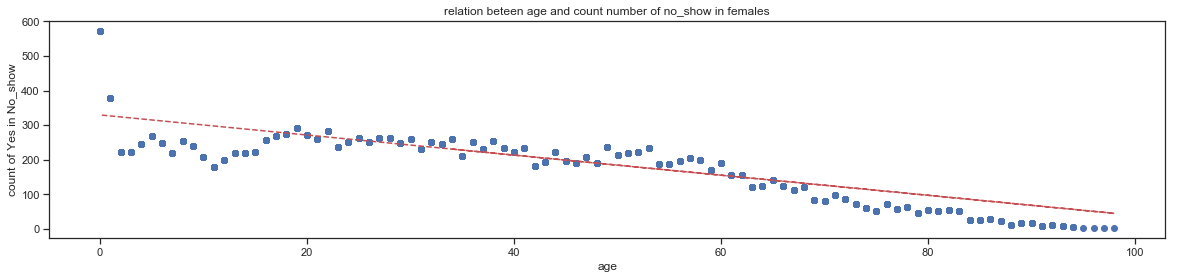

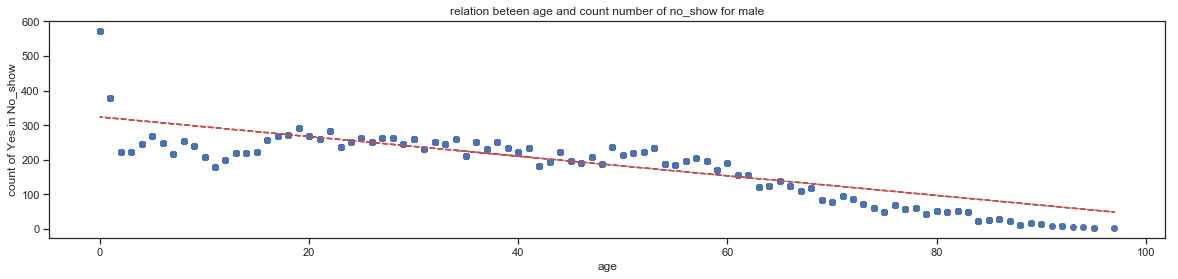

In [172]:
#femal trend 
df_fem_yes=df[(df.no_show == 'Yes') & (df.gender =='F')]
plt.figure(figsize = (20,4))
x = df_fem_yes['age']
y = df_fem_yes['no_show_count']
plt.title('relation beteen age and count number of no_show in females')
plt.xlabel('age')
plt.ylabel('count of Yes in No_show')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

#male trend
df_mal_yes=df[(df.no_show == 'Yes') & (df.gender =='M')] 
plt.figure(figsize = (20,4))
x = df_mal_yes['age']
y = df_mal_yes['no_show_count']
plt.title('relation beteen age and count number of no_show for male')
plt.xlabel('age')
plt.ylabel('count of Yes in No_show')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()



<div class="alert alert-block alert-info">
<b>Note </b>
</div>
1. trend lines slope for females are inverversely proportional to show up and not show up
* trend lines for males are inverversely proportional to show up and not show up
* There is a clear difference between the two genders in their numbers compared to the same age period



<div class="alert alert-block alert-info">
<b>does gender in different age stage affects their commitment to show up on the appointement date?</b>
</div>

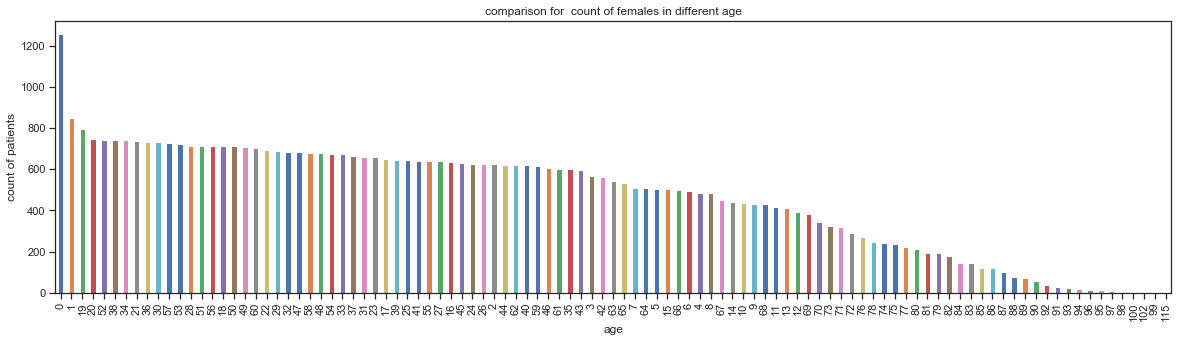

In [173]:
#the count number of females in different age stage
df_fem.age.value_counts().plot('bar',figsize=(20,5))
plt.title('comparison for  count of females in different age')
plt.xlabel('age')
plt.ylabel('count of patients');

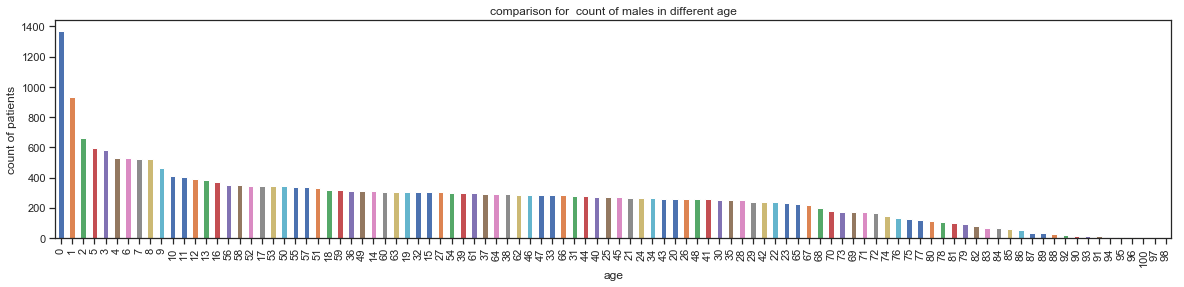

In [174]:
#the count number of males in different age stage
df_mal.age.value_counts().plot(kind='bar',figsize=(20,4))
plt.title('comparison for  count of males in different age')
plt.xlabel('age')
plt.ylabel('count of patients');

# ***count of patients in every age stage are completly different***
##### we going to make deep analysis for different age stage according to their gender 

# 3.3creat more and describtive feture

___
# age stages
1. Fetus (Unborn)<br>
* Newborn (Birth - 1 month)<br>
* Baby (1 month and 1 day - 2 years)<br>
* Toddler (3 - 5)<br> 
* Kids (6 - 9)<br>
* Pre-Teen (10 - 12)<br>
* Teenager (13 - 17)<br>
* Young Adult (18 - 20)<br>
* Adult (21 - 39)<br>
* Young Middle-Aged Adult (40 - 49)<br>
* Middle-Aged Adult (50 - 54)<br>
* Very Young Senior Citizen (55 - 64)<br>
* Young Senior Citizen (65 - 74)<br>
* Senior Citizen (75 - 84)<br> 
* Old Senior Citizen (85+)




<div class="alert alert-block alert-info">
<b>comparison for different age stages versuse no_show in different gender </b>
</div>

___

# femal study:

In [175]:
df_fem.groupby('no_show').age_stage.count()

no_show
No     37263
Yes    10850
Name: age_stage, dtype: int64

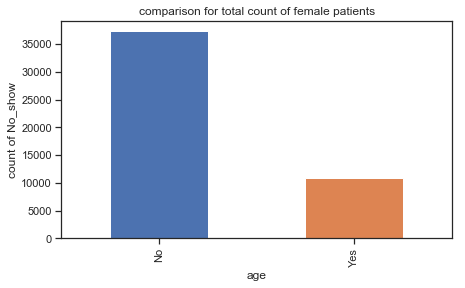

In [176]:
df_fem.groupby('no_show').age_stage.count().plot(kind ='bar',figsize=(7,4))
plt.title('comparison for total count of female patients')
plt.xlabel('age')
plt.ylabel('count of No_show');

In [177]:
print("proportion of `No_show` for age_stage  => {}".format(df_fem.groupby('no_show').age_stage.count()/df_fem.age_stage.count()))

proportion of `No_show` for age_stage  => no_show
No     0.774489
Yes    0.225511
Name: age_stage, dtype: float64


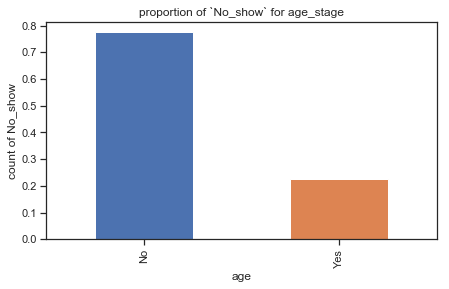

In [178]:
(df_fem.groupby('no_show').age_stage.count()/df_fem.age_stage.count()).plot(kind ='bar',figsize=(7,4))
plt.title('proportion of `No_show` for age_stage')
plt.xlabel('age')
plt.ylabel('count of No_show');

# male study:

In [179]:
df_mal.groupby('no_show').age_stage.count()

no_show
No     20522
Yes     5878
Name: age_stage, dtype: int64

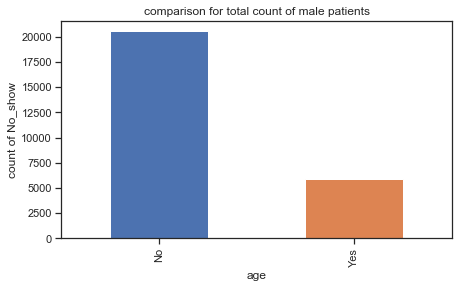

In [180]:
df_mal.groupby('no_show').age_stage.count().plot(kind ='bar',figsize=(7,4))
plt.title('comparison for total count of male patients')
plt.xlabel('age')
plt.ylabel('count of No_show');

In [181]:
print("proportion of `No_show` for age_stage  => {}".format(df_mal.groupby('no_show').age_stage.count()/df_mal.age_stage.count()))

proportion of `No_show` for age_stage  => no_show
No     0.777348
Yes    0.222652
Name: age_stage, dtype: float64


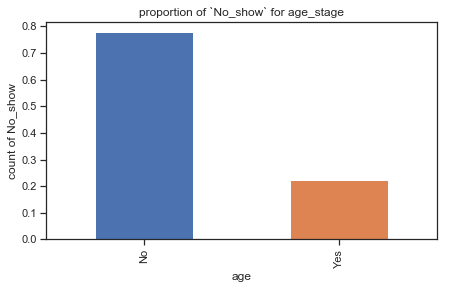

In [182]:
(df_mal.groupby('no_show').age_stage.count()/df_mal.age_stage.count()).plot(kind ='bar',figsize=(7,4))
plt.title('proportion of `No_show` for age_stage')
plt.xlabel('age')
plt.ylabel('count of No_show');


___
<div class="alert alert-block alert-info">
<b>sorting data sets for different age stages</b>
</div>

# femal study

In [183]:
df_fem.age_stage.value_counts()

Adult                        12788
Young_Middle_Aged_Adult       6440
Very_Young_Senior_Citizen     6251
Young_Senior_Citizen          3520
Middle_Aged_Adult             3498
Baby                          3296
Teenager                      2939
Young_Adult                   2281
Senior_Citizen                1941
Kids                          1867
Toddler                       1488
Pre-Teen                      1224
Old_Senior_Citizen             580
Name: age_stage, dtype: int64

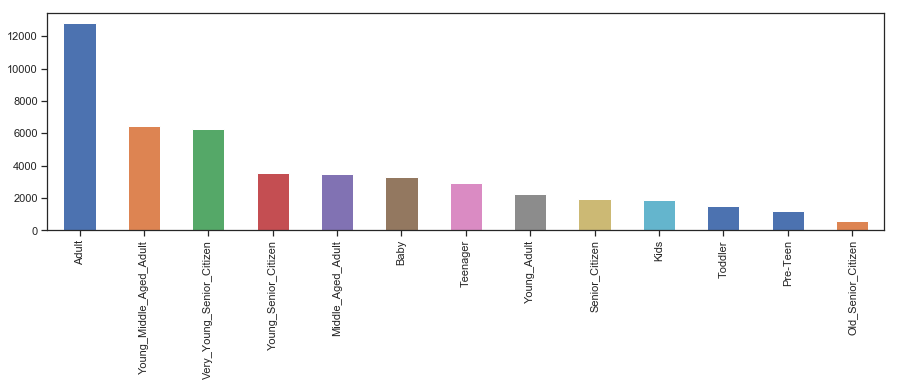

In [184]:
df_fem['age_stage'].value_counts().plot(kind='bar',figsize=(15,4));

# male study

In [185]:
df_mal.age_stage.value_counts()

Adult                        5153
Baby                         3547
Very_Young_Senior_Citizen    3065
Young_Middle_Aged_Adult      2777
Kids                         1918
Young_Senior_Citizen         1830
Toddler                      1657
Middle_Aged_Adult            1656
Teenager                     1640
Pre-Teen                     1178
Senior_Citizen                928
Young_Adult                   834
Old_Senior_Citizen            217
Name: age_stage, dtype: int64

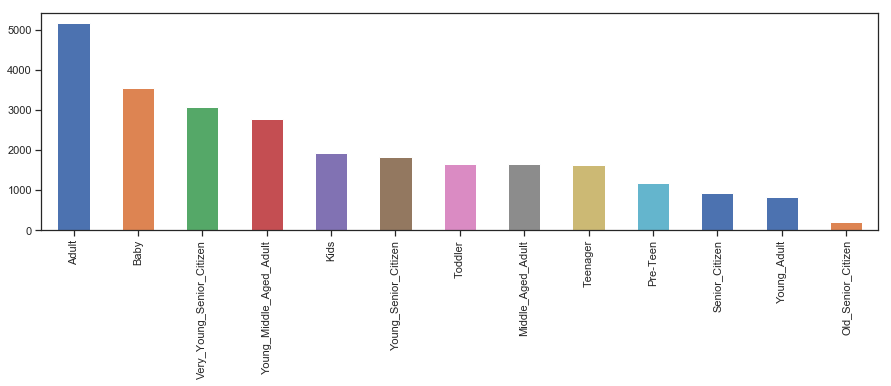

In [186]:
df_mal['age_stage'].value_counts().plot(kind='bar',figsize=(15,4));


___
<div class="alert alert-block alert-info">
<b>comparison of counts of patients for no_show in different age_stage </b>
</div>

# femal study

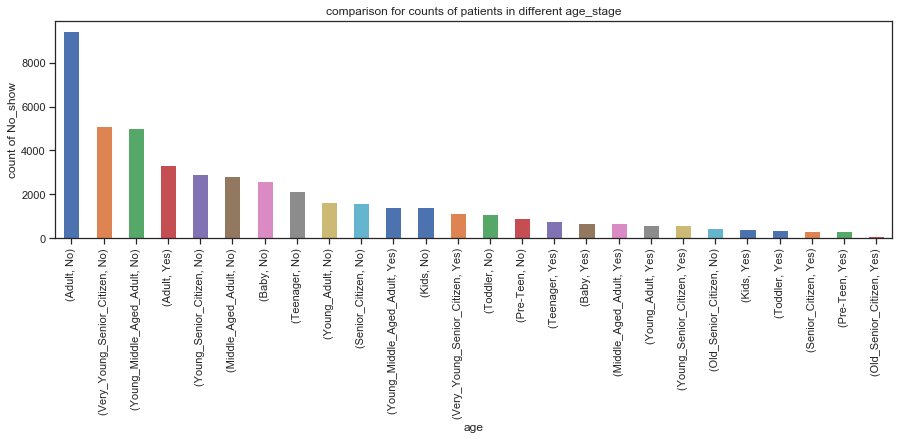

In [187]:
fr=df_fem.groupby('age_stage').no_show.value_counts();
fr.sort_values(ascending=False).plot(kind='bar',figsize=(15,4))
plt.title('comparison for counts of patients in different age_stage')
plt.xlabel('age')
plt.ylabel('count of No_show');

___
<div class="alert alert-block alert-info">
<b>proportional comparison of counts of females for no_show in different age_stage</b>
</div>

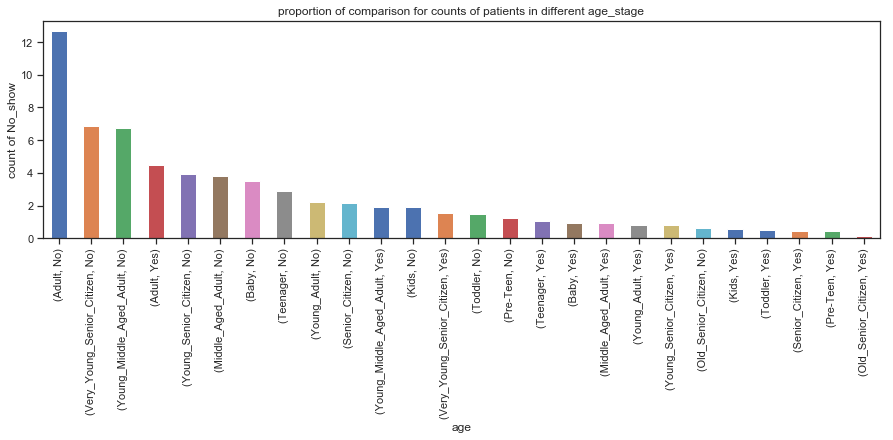

In [188]:
tr=((df_fem.groupby('age_stage').no_show.value_counts())/df.age_stage.count())*100
tr.sort_values(ascending=False).plot(kind='bar',figsize=(15,4))
plt.title('proportion of comparison for counts of patients in different age_stage')
plt.xlabel('age')
plt.ylabel('count of No_show');

# male study

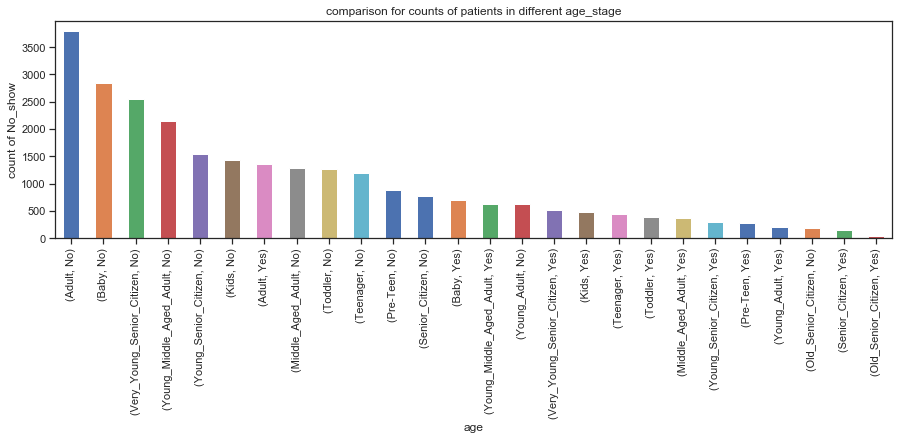

In [189]:
fr=df_mal.groupby('age_stage').no_show.value_counts();
fr.sort_values(ascending=False).plot(kind='bar',figsize=(15,4))
plt.title('comparison for counts of patients in different age_stage')
plt.xlabel('age')
plt.ylabel('count of No_show');

___
<div class="alert alert-block alert-info">
<b>proportional comparison of counts of males for no_show in different age_stage</b>
</div>

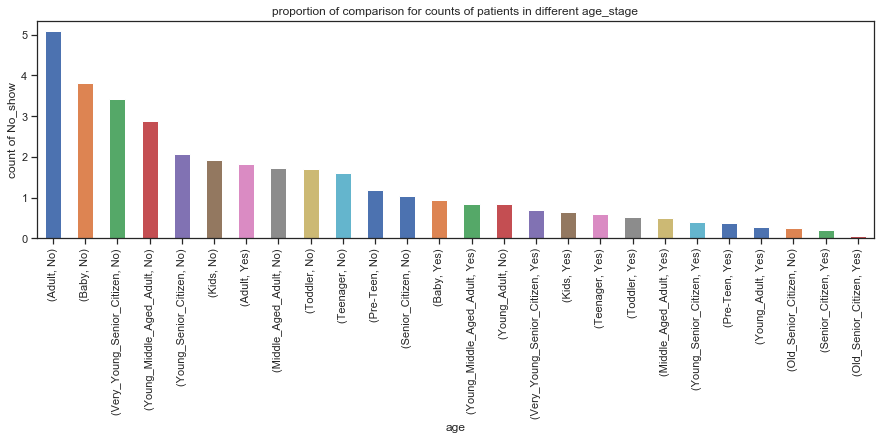

In [190]:
tr=((df_mal.groupby('age_stage').no_show.value_counts())/df.age_stage.count())*100
tr.sort_values(ascending=False).plot(kind='bar',figsize=(15,4))
plt.title('proportion of comparison for counts of patients in different age_stage')
plt.xlabel('age')
plt.ylabel('count of No_show');

___
<div class="alert alert-block alert-info">
<b>neumerical proportional comparison for count of patients versus no_show in different age_stage</b>
</div>

# femal study

In [191]:
tr=((df_fem.groupby('age_stage').no_show.value_counts())/df_fem.age_stage.count())*100
tr.sort_values(ascending=False)

age_stage                  no_show
Adult                      No         19.628791
Very_Young_Senior_Citizen  No         10.618752
Young_Middle_Aged_Adult    No         10.402594
Adult                      Yes         6.950304
Young_Senior_Citizen       No          6.085673
Middle_Aged_Adult          No          5.873672
Baby                       No          5.422651
Teenager                   No          4.449941
Young_Adult                No          3.456446
Senior_Citizen             No          3.335897
Young_Middle_Aged_Adult    Yes         2.982562
Kids                       No          2.961777
Very_Young_Senior_Citizen  Yes         2.373579
Toddler                    No          2.307069
Pre-Teen                   No          1.899694
Teenager                   Yes         1.658595
Baby                       Yes         1.427889
Middle_Aged_Adult          Yes         1.396712
Young_Adult                Yes         1.284476
Young_Senior_Citizen       Yes         1.230437
Old_S

# male study

In [192]:
tr=((df_mal.groupby('age_stage').no_show.value_counts())/df_mal.age_stage.count())*100
tr.sort_values(ascending=False)

age_stage                  no_show
Adult                      No         14.367424
Baby                       No         10.753788
Very_Young_Senior_Citizen  No          9.643939
Young_Middle_Aged_Adult    No          8.121212
Young_Senior_Citizen       No          5.833333
Kids                       No          5.458333
Adult                      Yes         5.151515
Middle_Aged_Adult          No          4.837121
Toddler                    No          4.821970
Teenager                   No          4.530303
Pre-Teen                   No          3.375000
Senior_Citizen             No          2.931818
Baby                       Yes         2.681818
Young_Middle_Aged_Adult    Yes         2.397727
Young_Adult                No          2.386364
Very_Young_Senior_Citizen  Yes         1.965909
Kids                       Yes         1.806818
Teenager                   Yes         1.681818
Toddler                    Yes         1.454545
Middle_Aged_Adult          Yes         1.435606
Young

___

<div class="alert alert-block alert-info">
<b> ranking of the percentage of the patients who will come to their appointment on time according to their age</b>
</div>

# femal study

In [193]:
ranking= df_fem.query('no_show=="No"').age_stage.value_counts()
rankin= df_fem.age_stage.value_counts()
per=ranking/rankin*100 
per.sort_values(ascending=False)


Old_Senior_Citizen           83.448276
Young_Senior_Citizen         83.181818
Senior_Citizen               82.689335
Very_Young_Senior_Citizen    81.730923
Middle_Aged_Adult            80.789022
Baby                         79.156553
Young_Middle_Aged_Adult      77.717391
Kids                         76.325656
Pre-Teen                     74.673203
Toddler                      74.596774
Adult                        73.850485
Young_Adult                  72.906620
Teenager                     72.847907
Name: age_stage, dtype: float64

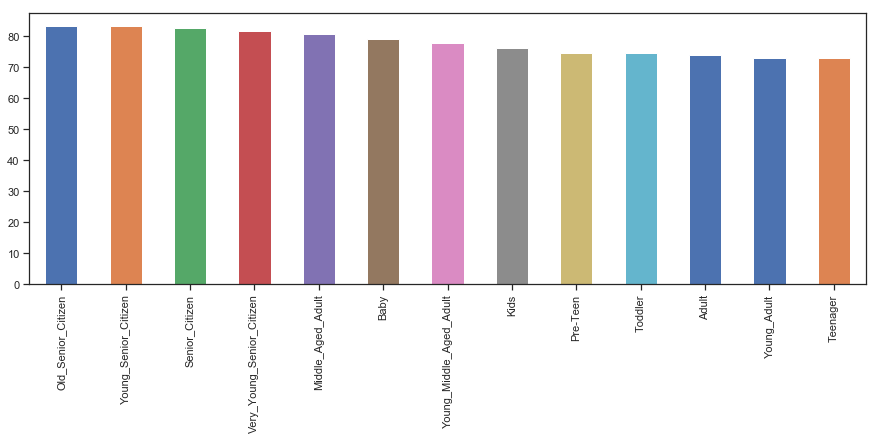

In [194]:
per.sort_values(ascending=False).plot(kind='bar',figsize=(15,5));

# male study

In [195]:
ranking= df_mal.query('no_show=="No"').age_stage.value_counts()
rankin= df_mal.age_stage.value_counts()
per=ranking/rankin*100 
per.sort_values(ascending=False)

Young_Senior_Citizen         84.153005
Senior_Citizen               83.405172
Very_Young_Senior_Citizen    83.066884
Old_Senior_Citizen           82.027650
Baby                         80.039470
Young_Middle_Aged_Adult      77.205618
Middle_Aged_Adult            77.113527
Toddler                      76.825588
Pre-Teen                     75.636672
Young_Adult                  75.539568
Kids                         75.130344
Adult                        73.607607
Teenager                     72.926829
Name: age_stage, dtype: float64

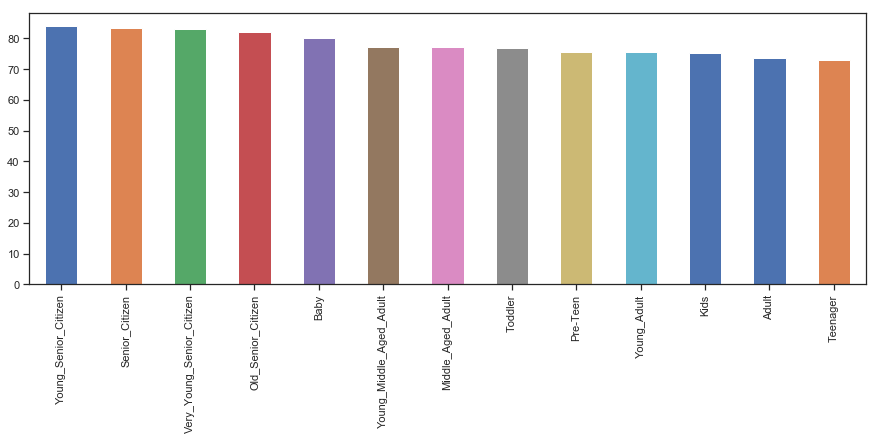

In [196]:
per.sort_values(ascending=False).plot(kind='bar',figsize=(15,5));


___
<div class="alert alert-block alert-info">
<b> ranking of the percentage of the patients who will not come to their appointment on time according to their age</b>
</div>

# femal study

In [197]:
ranking= df_fem.query('no_show=="Yes"').age_stage.value_counts()
rankin= df_fem.age_stage.value_counts()
per=ranking/rankin*100 
per.sort_values(ascending=False)

Teenager                     27.152093
Young_Adult                  27.093380
Adult                        26.149515
Toddler                      25.403226
Pre-Teen                     25.326797
Kids                         23.674344
Young_Middle_Aged_Adult      22.282609
Baby                         20.843447
Middle_Aged_Adult            19.210978
Very_Young_Senior_Citizen    18.269077
Senior_Citizen               17.310665
Young_Senior_Citizen         16.818182
Old_Senior_Citizen           16.551724
Name: age_stage, dtype: float64

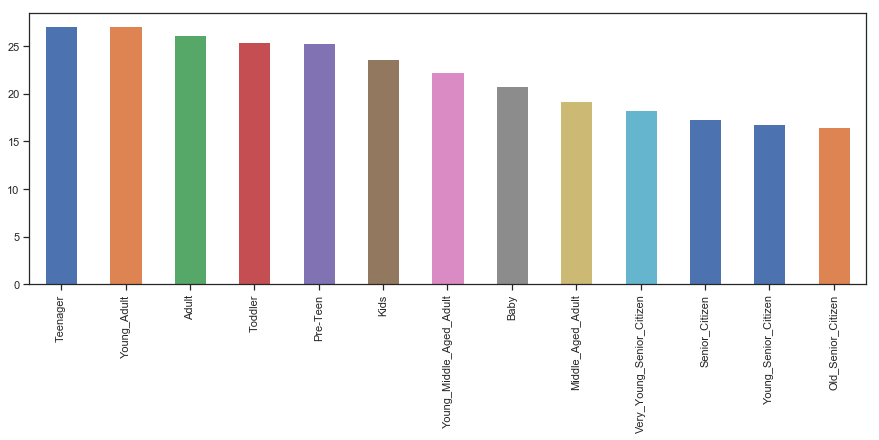

In [198]:
per.sort_values(ascending=False).plot(kind='bar',figsize=(15,5));

# male study

In [199]:
ranking= df_mal.query('no_show=="Yes"').age_stage.value_counts()
rankin= df_mal.age_stage.value_counts()
per=ranking/rankin*100 
per.sort_values(ascending=False)

Teenager                     27.073171
Adult                        26.392393
Kids                         24.869656
Young_Adult                  24.460432
Pre-Teen                     24.363328
Toddler                      23.174412
Middle_Aged_Adult            22.886473
Young_Middle_Aged_Adult      22.794382
Baby                         19.960530
Old_Senior_Citizen           17.972350
Very_Young_Senior_Citizen    16.933116
Senior_Citizen               16.594828
Young_Senior_Citizen         15.846995
Name: age_stage, dtype: float64

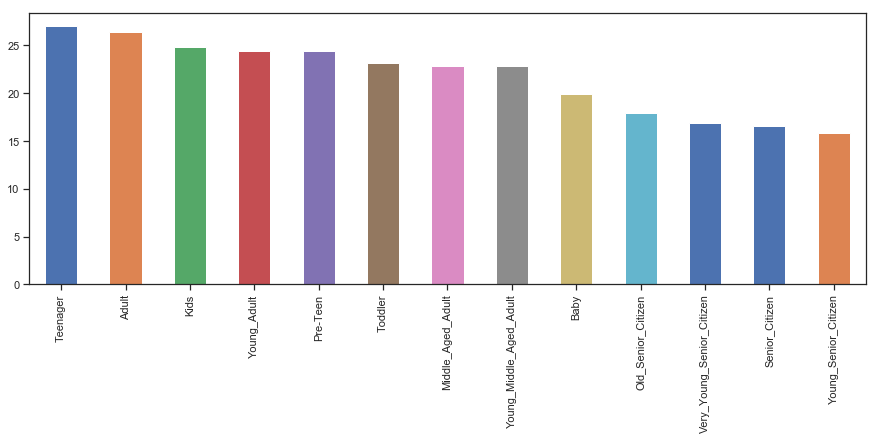

In [200]:
per.sort_values(ascending=False).plot(kind='bar',figsize=(15,5));

# ***3.4conclusion :***

___

<table>

| age stage                 	| age in years                	| % of expected commitment for   appointment date   in females  (no_show==NO)   	| % of expected commitment for   appointment date   in males  (no_show==NO) 	|
|---------------------------	|-----------------------------	|:-----------------------------------------------------------------------------:	|:-------------------------------------------------------------------------:	|
| Baby                      	| 1 month and 1 day - 2 years 	| 79.156                                                                        	| 80.039                                                                    	|
| Toddler                   	| 3 - 5                       	| 74.596                                                                        	| 76.825                                                                    	|
| Kids                      	| 6 - 9                       	| 76.325                                                                        	| 75.130                                                                    	|
| Pre-Teen                  	| 10 - 12                     	| 74.673                                                                        	| 75.636                                                                    	|
| Teenage                   	| 13 - 17                     	| 72.847                                                                        	| 72968                                                                     	|
| Young Adult               	| 18 - 20                     	| 72.906                                                                        	| 75.539                                                                    	|
| Adult                     	| 21 - 39                     	| 73.850                                                                        	| 73.607                                                                    	|
| Young Middle-Aged Adult   	| 40 - 49                     	| 77.717                                                                        	| 77.205                                                                    	|
| Middle-Aged Adult         	| 50 - 54                     	| 80.789                                                                        	| 77.113                                                                    	|
| Very Young Senior Citizen 	| 55 - 64                     	| 81.730                                                                        	| 83.066                                                                    	|
| Young Senior Citizen      	| 65 - 74                     	| 83.181                                                                        	| 84.153                                                                    	|
| Senior Citizen            	| 75 - 84                     	| 82.689                                                                        	| 83.405                                                                    	|
| Old Senior Citizen        	| 85+                         	| 83.448                                                                        	| 82.027                                                                    	|

<table>

1. % of expected commitment for appointment date for age stage from  0 upto 20 years old in males greater than females <br> except in for age stage from 6:9 years
*  % of expected commitment for appointment date for age stage from  55 upto 84 years old in males greater than females <br> 
___
*  % of expected commitment for appointment date for age stage from  21 upto 54 years old in males greater than females <br>
*  % of expected commitment for appointment date for age stage from  +85 years old in females greater than males <br> 


# final conclusion 
___

        
  

<div class="alert alert-block alert-success">
<b>age ,waiting days and gender of patient affect  % of expected commitment for appointment date  </b> 
</div>
